# Исследование данных о продаже компьютерных игр.

Импорт необходимых библиотек:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

## Подготовка данных

### Выгрузка данных в датафрейм

In [2]:
df = pd.read_csv(r"C:\Users\danii\projects\final_project_1_computer_games\games.csv")
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Была выполнена выгрузка исходных данных в датафрейм. В исходных необработанных данных содержится информация о 16715 объектах по следующим параметрам: 
- Название игры;
- Платформа, на которой выпущена игра;
- Жанр игры;
- Количество проданных игр в Северной Америке;
- Количество проданных игр в Европе;
- Количество проданных игр в Японии;
- Количество проданных игр в остальных странах;
- Оценка игры от критиков;
- Оценка игры от пользователей;
- Возрастной рейтинг игры.

Наибольшее количество пропусков в данных содержится в параметрах "Оценка от критиков", "Оценка от пользователей", "Возрастной рейтинг".


## Предобработка данных.

### Приведение заголовков столбцов к необходимому формату.

In [4]:
df.columns = df.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Поиск дубликатов.

In [5]:
df[df.duplicated(['name', 'platform', 'year_of_release'], keep = False) == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


Удаляем дубликат, где отсутствуют данные по продажам:

In [6]:
df = df.drop(index = 16230)

"K-A" - устаревшее название категории "E" рейтинга игр ESRB, поэтому присваеваем "Е" для данных ячеек:

In [7]:
df.loc[df['rating'] == 'K-A', 'rating'] = "E"

### Заполнение пропусков

In [8]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [9]:
for val in ['year_of_release', 'critic_score', 'user_score', 'rating']:
    print(val, '\n', df[val].unique())

year_of_release 
 [2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]
critic_score 
 [76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 35. 41. 36.
 28. 31. 27. 26. 19. 23. 24. 21. 17. 22. 13.]
user_score 
 ['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '

#### Заполнение пропусков в параметре "Название игры".

Строки, где пропуск в названии следует удалить, их количество мало, чтобы повлиять на результаты исследования, а также в данных строках много пропусков по остальным параметрам. Пропуск мог возникнуть из-за того что официального названия у игры не было на момент заполнения данных, или из-за технической ошибки.

In [10]:
df = df.dropna(subset=['name'])

#### Заполнение пропусков в параметре "Год выпуска".

Часть пропусков заполняем цифрой из названия игры:

In [11]:
def year_name(row):
    if np.isnan(row['year_of_release']):
        year = ''
        for c in row['name']:
            if c.isdigit():
                year = year + c
        if len(year) == 4:
            return int(year) - 1
        else:
            return row['year_of_release']
    else:
        return row['year_of_release'] 
df['year_of_release'] = df.apply(year_name, axis = 1)

In [12]:
df_origin = df

In [13]:
df = df[~np.isnan(df['year_of_release'])]

Остальные строки с пропусками для данного параметра удаляем. Пропуски могли возникнуть из за того что дата официального релиза часто переносится и могла отсутствовать на момент заполнения данных.

#### Заполнение пропусков в параметре "Оценки пользователей".

Сокращение "TBD" означает, что оценки для данной игры еще не были определены, поэтому ячейки с таким значением заполняем как пропуск:

In [14]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan

Пропуски для данного параметра оставляем без изменений, так как их слишком много, чтобы заполнять медианным или средним значением, и прямая корреляция с другими параметрами отсутствует. Причиной возникновения пропусков могло стать то, что игра не оценена из-за того, что она недавно вышла или имела низкую популярность. 

#### Заполнение пропусков в параметре "Рейтинг".

In [15]:
pd.options.mode.chained_assignment = None

In [16]:
df['rating'] = df['rating'].fillna('without')

Причиной возникновения пропусков могло стать то, что игра не получила рейтинг из-за того, что она недавно вышла или система рейтингов на момент выхода игры не функционировала. Так же основной причиной может являться тот факт, что в исходных данных приведены рейтинги  от Entertainment Software Rating Board, данная организация выставляет рейтинги только для стран Северной Америки и Мексики, в то время как в остальных странах возрастные рейтинги выставляются другими организациями. Таким образом, если игра была выпущена только для внутреннего рынка, она могла не получить рейтинг от ESRB.

In [17]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8466
user_score         8988
rating                0
dtype: int64

Пропуски для параметра "Оценки критиков" оставляем без изменений, так как их слишком много, чтобы заполнять медианным или средним значением, и прямая корреляция с другими параметрами отсутствует. Причиной возникновения пропусков могло стать то, что игра не оценена из-за того, что она недавно вышла или имела низкую популярность. 

### Приведение данных к необходимому формату.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16461 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16461 non-null  object 
 1   platform         16461 non-null  object 
 2   year_of_release  16461 non-null  float64
 3   genre            16461 non-null  object 
 4   na_sales         16461 non-null  float64
 5   eu_sales         16461 non-null  float64
 6   jp_sales         16461 non-null  float64
 7   other_sales      16461 non-null  float64
 8   critic_score     7995 non-null   float64
 9   user_score       7473 non-null   object 
 10  rating           16461 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [19]:
df['user_score'] = df['user_score'].astype('float')

In [20]:
df['year_of_release'] = df['year_of_release'].astype('int')

### Добавление данных о суммарных продажах.

In [21]:
def sum(row):
    return row['na_sales'] + row['eu_sales'] + row['jp_sales'] + row['other_sales']
df['sales'] = df.apply(sum, axis = 1)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16461 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16461 non-null  object 
 1   platform         16461 non-null  object 
 2   year_of_release  16461 non-null  int32  
 3   genre            16461 non-null  object 
 4   na_sales         16461 non-null  float64
 5   eu_sales         16461 non-null  float64
 6   jp_sales         16461 non-null  float64
 7   other_sales      16461 non-null  float64
 8   critic_score     7995 non-null   float64
 9   user_score       7473 non-null   float64
 10  rating           16461 non-null  object 
 11  sales            16461 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB


Для проведения исследования была выполнена загрузка и предобработка данных, в результате которой были удалены строки с пропущенными значениями в названии игр и года выхода, были удалены явные и не явные дубликаты, данные были приведены к необходимому формату, был добавлен параметр о суммарных продажах.

## Исследовательский анализ данных.

### Количество игр, выпущенных в разные годы.

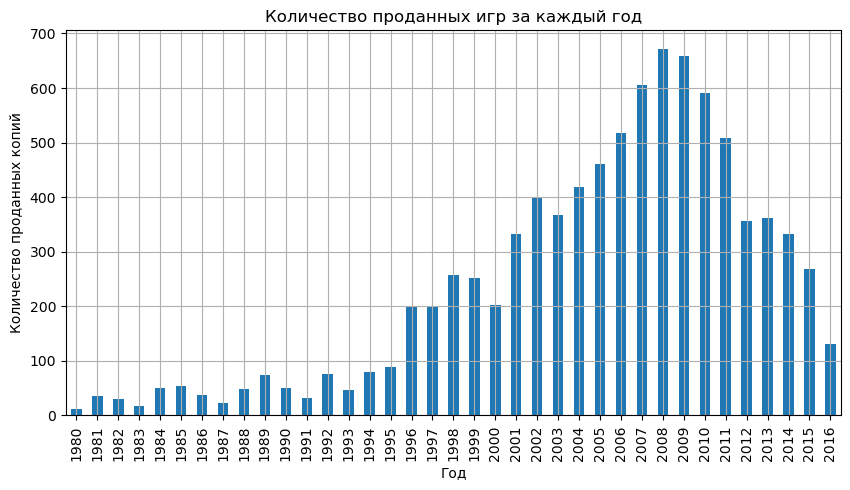

In [23]:
s = df.groupby('year_of_release')['sales'].sum().plot(kind = 'bar',
                        xlabel = 'Год', ylabel = 'Количество проданных копий', figsize = (10,5), grid = True,
                        title  = 'Количество проданных игр за каждый год')


До 1995 года наблюдался планый рост количества проданных игр, затем резкий рост до максимального значения в 2008 году, затем резкое падение. Основной причиной этого являлся кризис 2008 года, после которого многие из лидеров игровой индустрии в целях экономии бюджетов изменили подход к разработке игр: больший упор делался на разработку мобильных игр, введение внутриигровых платных транзакций, выпуск игровых дополнений, таким образом "жизнь" игры продлевалась, в следствии уменьшилось количество выпускаемых и продаваемых игр. 

### Анализ продаж по платформам.

#### Определение платформ с наибольшими суммарными продажами.

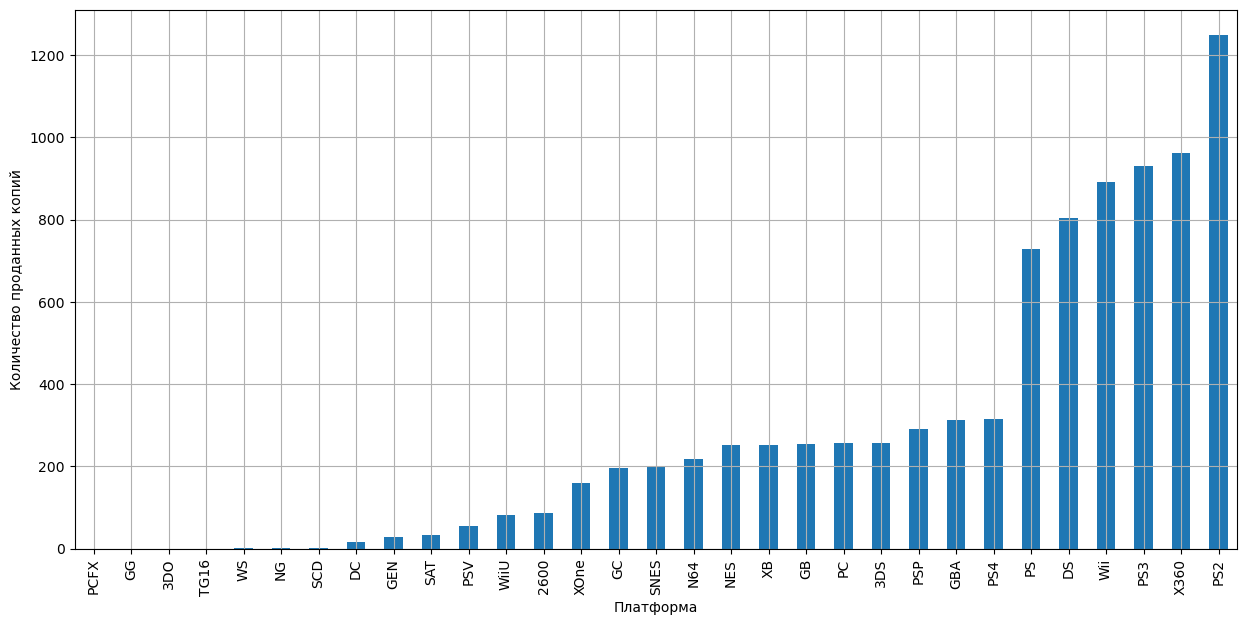

platform
3DS      257.81
PSP      290.34
GBA      312.88
PS4      314.14
PS       727.58
DS       802.79
Wii      891.18
PS3      931.33
X360     961.30
PS2     1248.12
Name: sales, dtype: float64

In [24]:
plat = df.groupby('platform')['sales'].sum().sort_values().plot(kind = 'bar',
                        xlabel = 'Платформа', ylabel = 'Количество проданных копий', figsize = (15,7), grid = True);
plt.show();
df.groupby('platform')['sales'].sum().sort_values().tail(10)

Лидером по количеству проданных копий за все время является платформа PS2, также к лидерам можно отнести X360, Wii, PS3, DS, PS.

#### Исследование измения продаж по платформам.

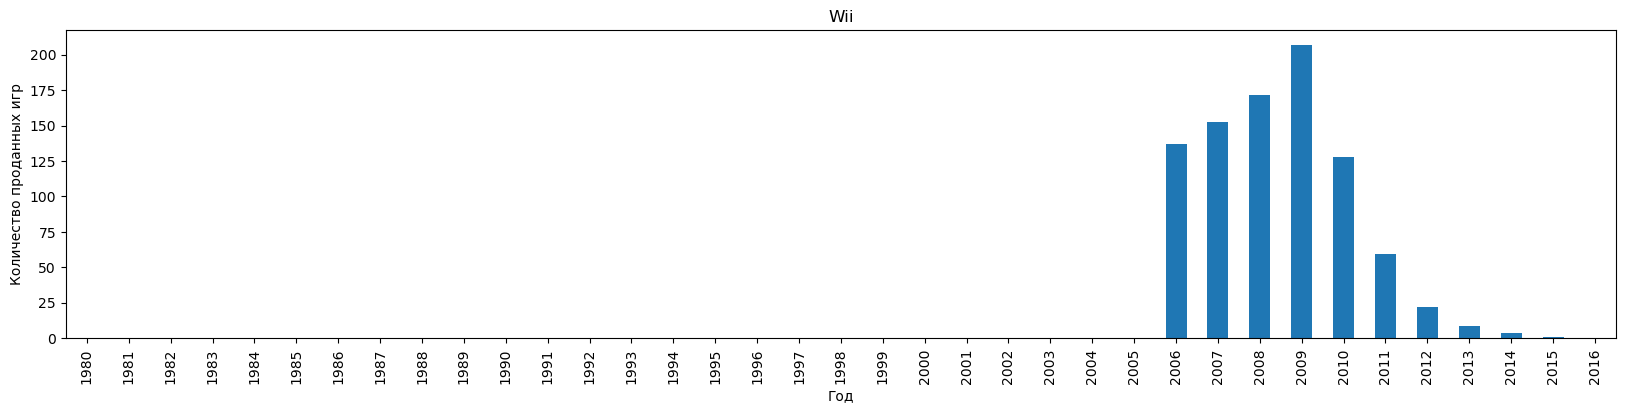

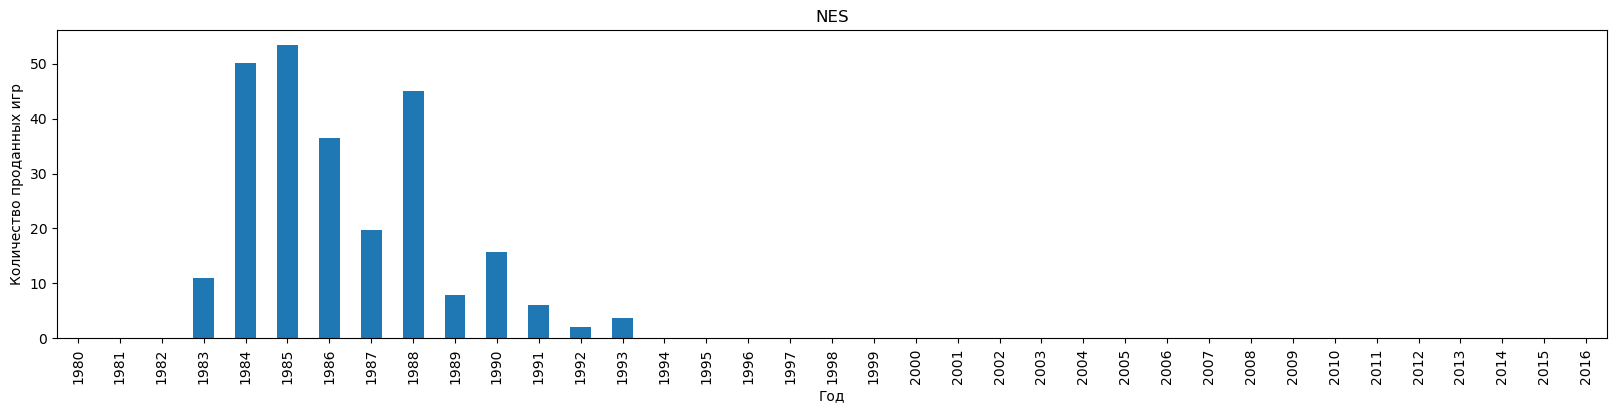

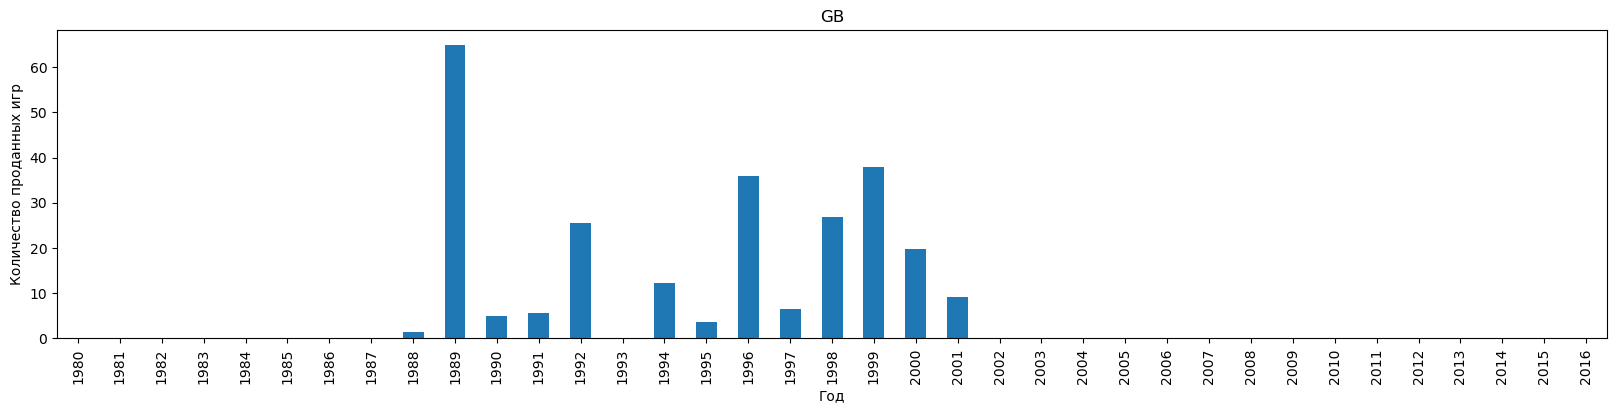

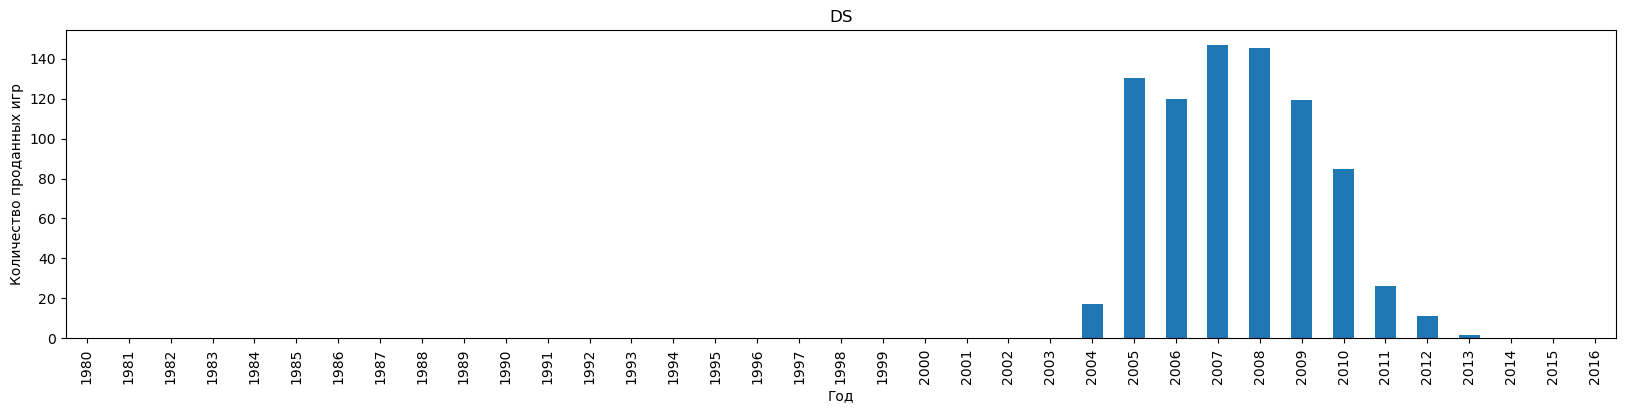

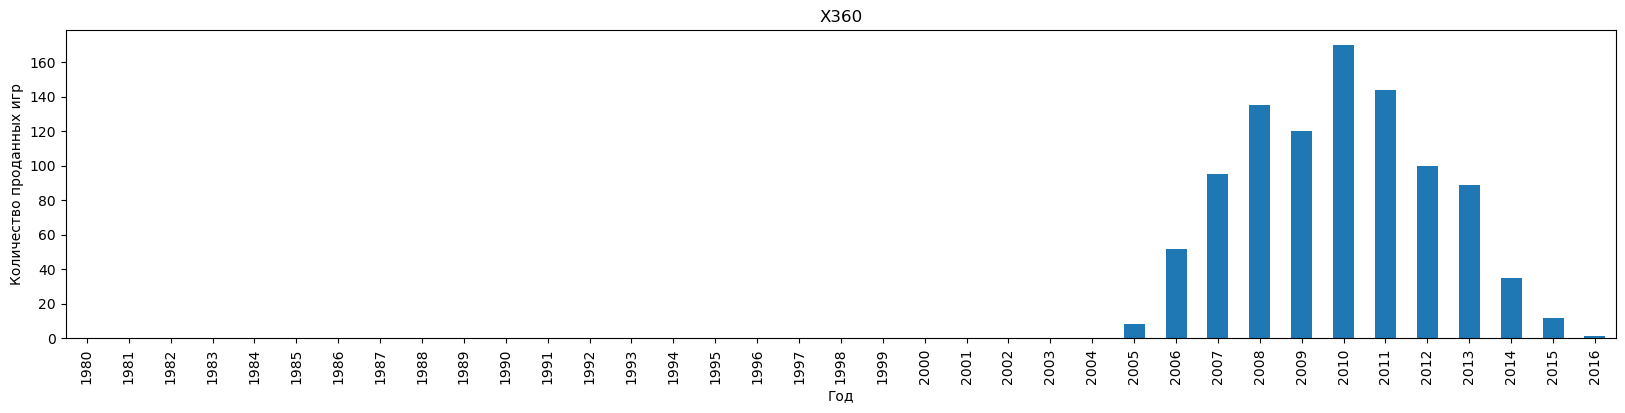

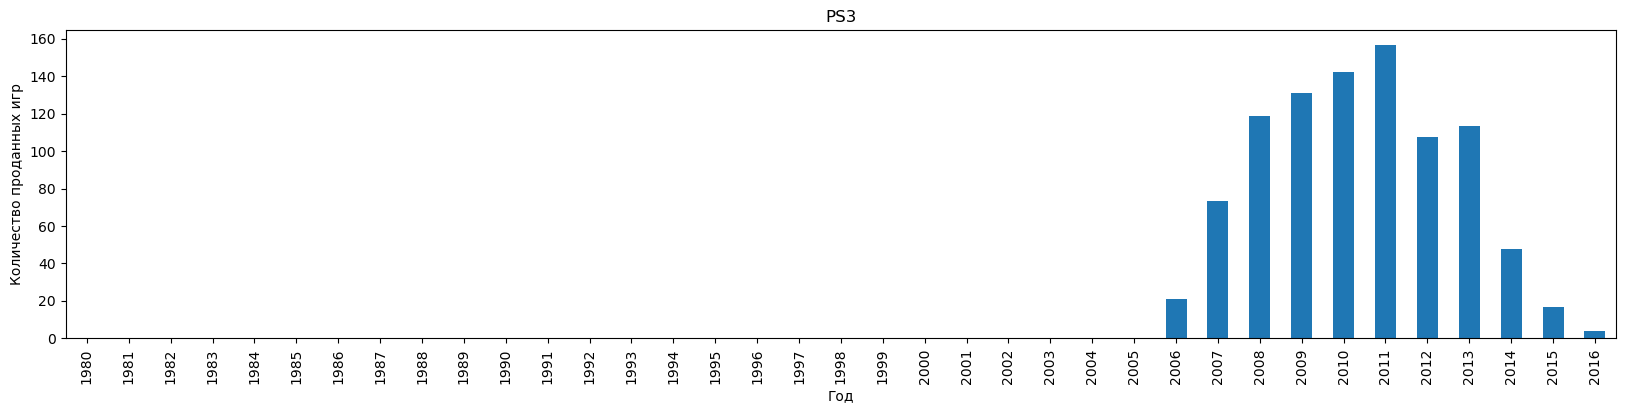

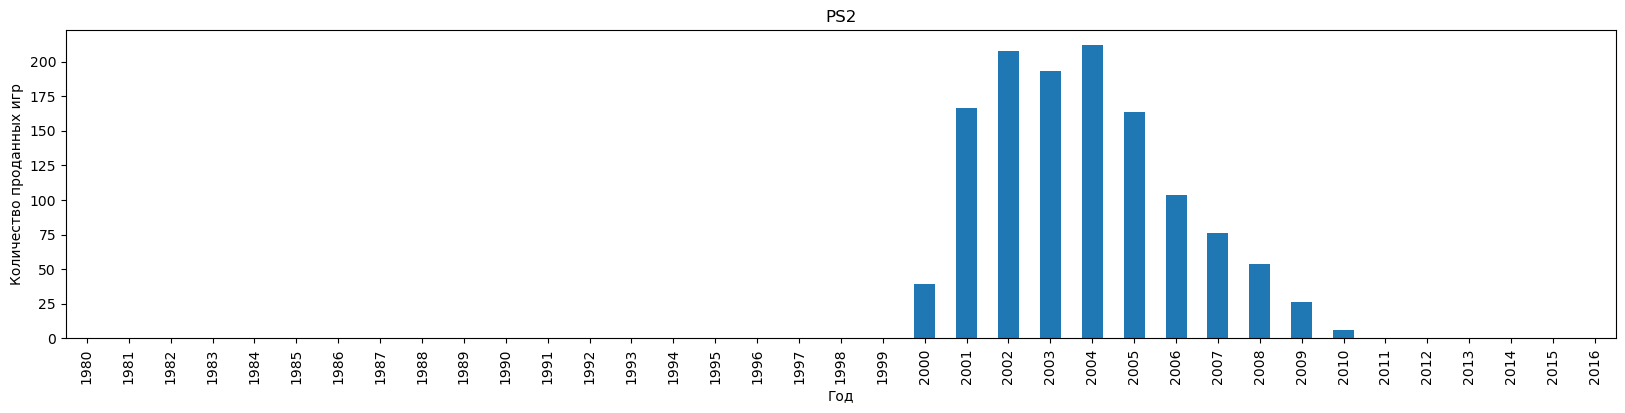

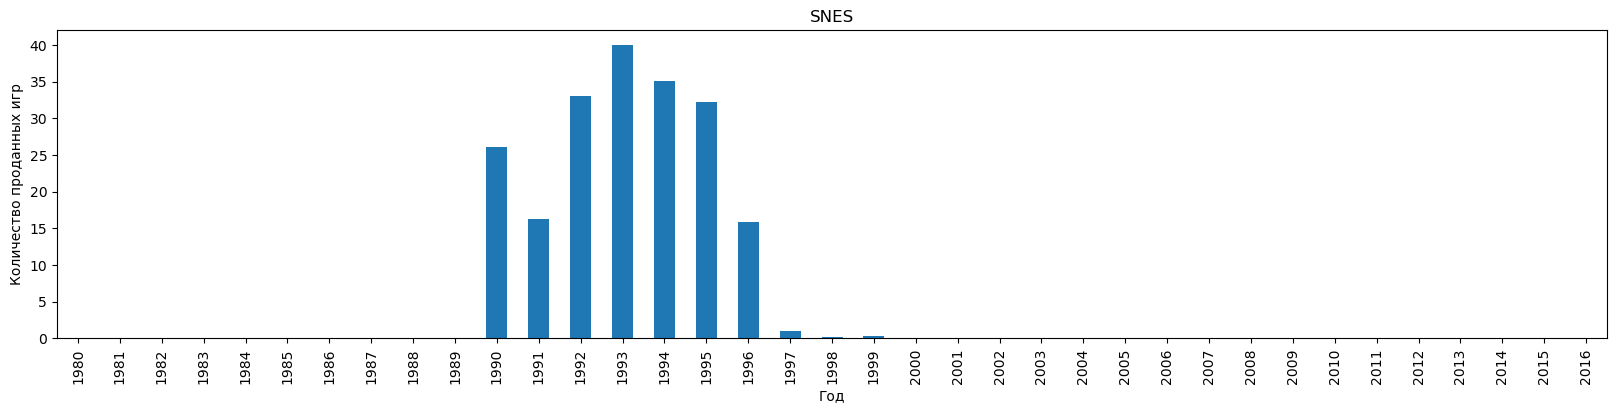

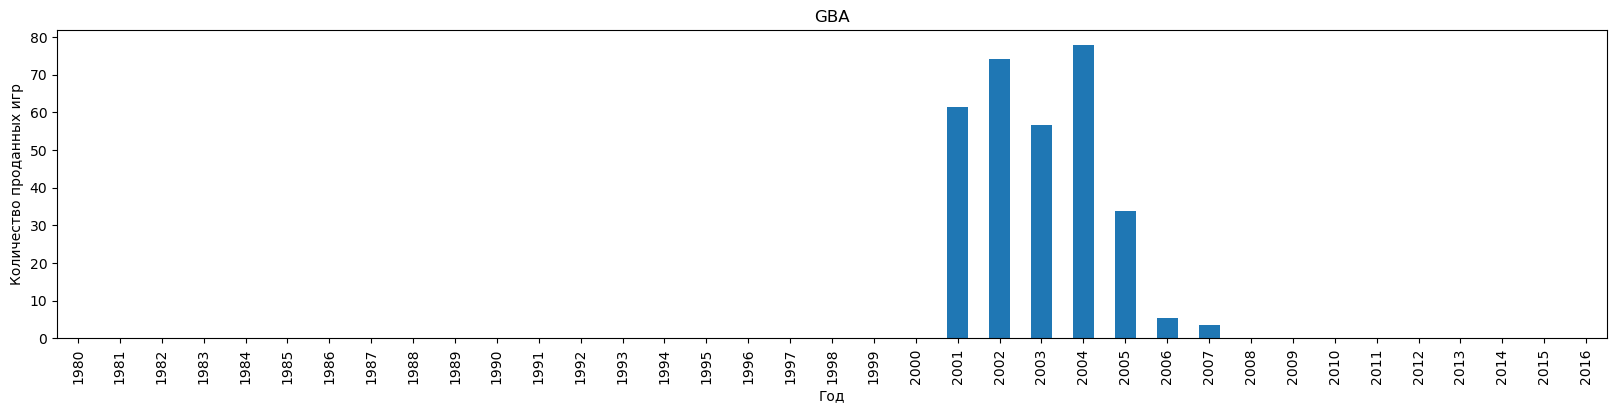

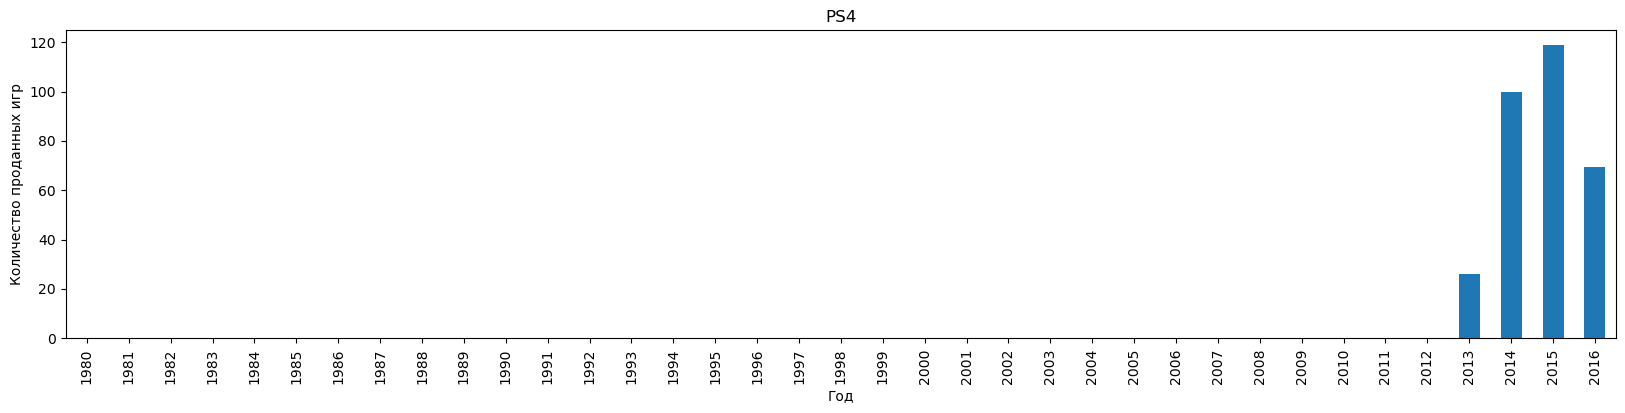

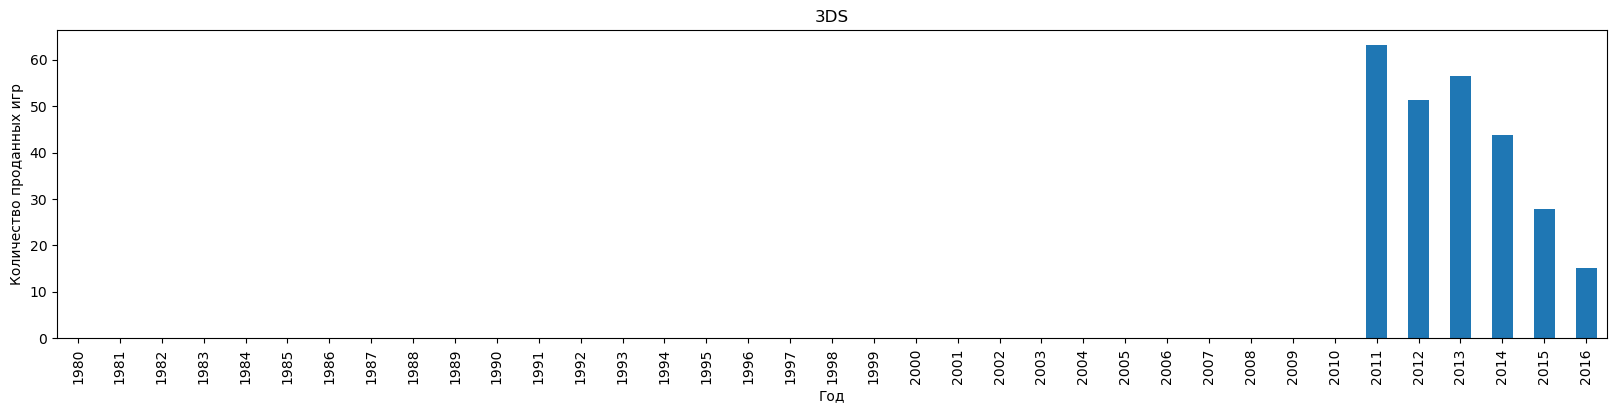

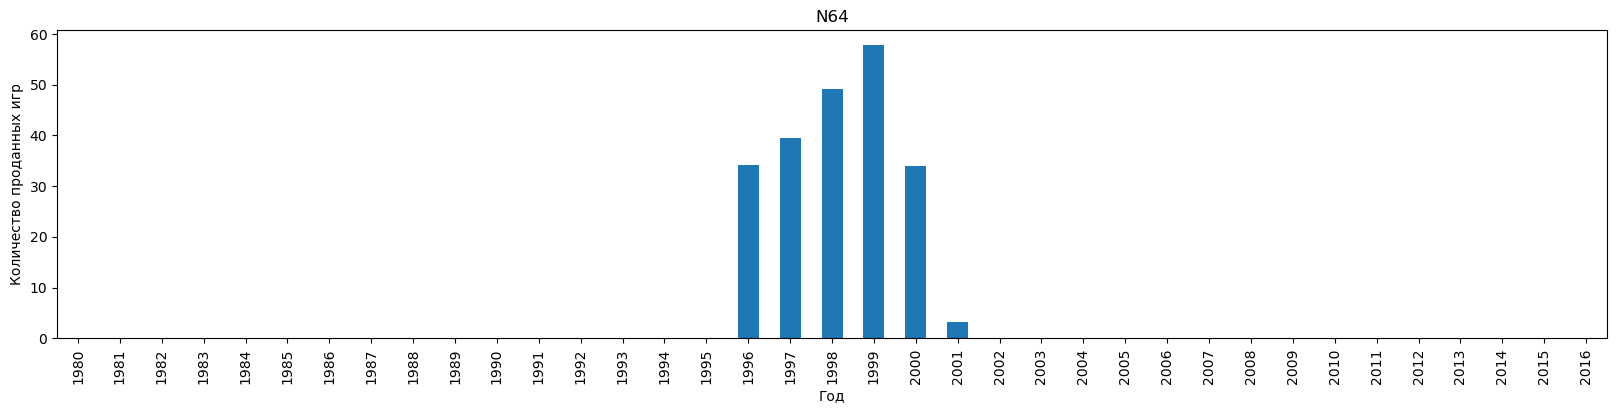

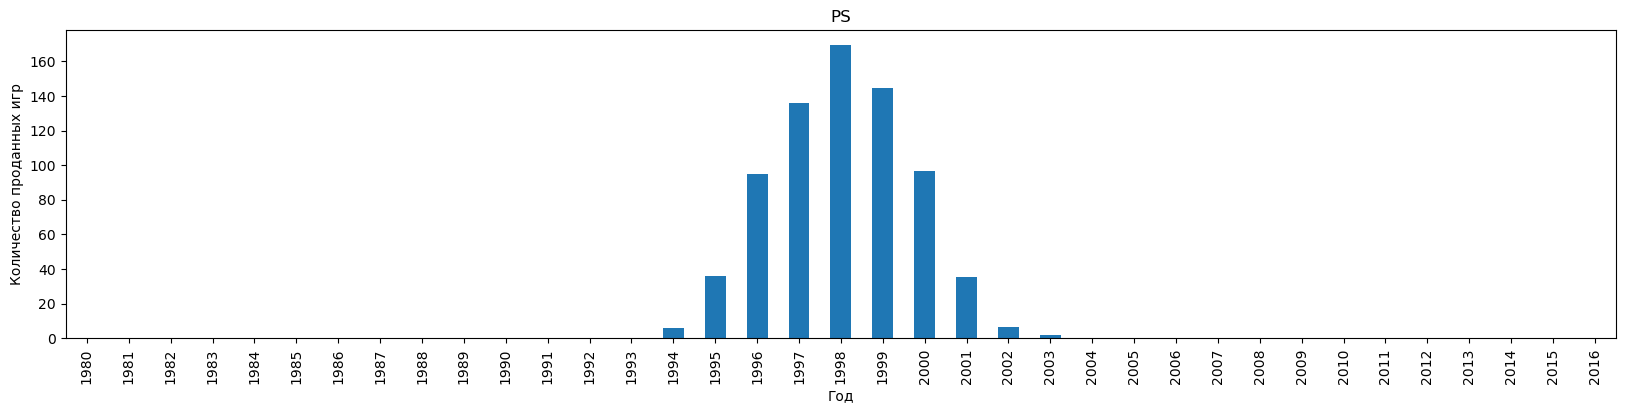

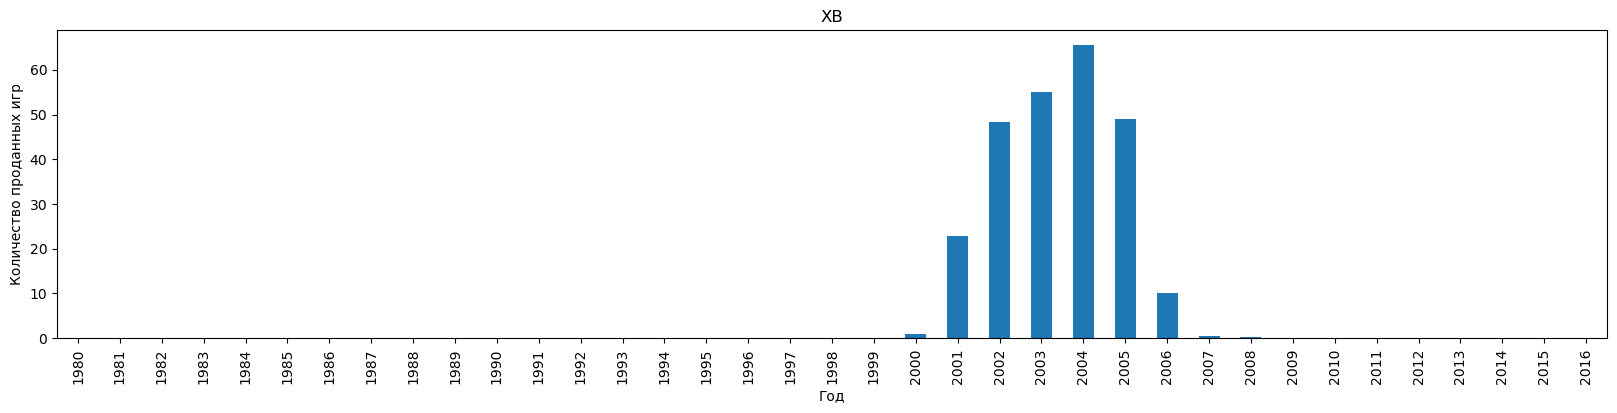

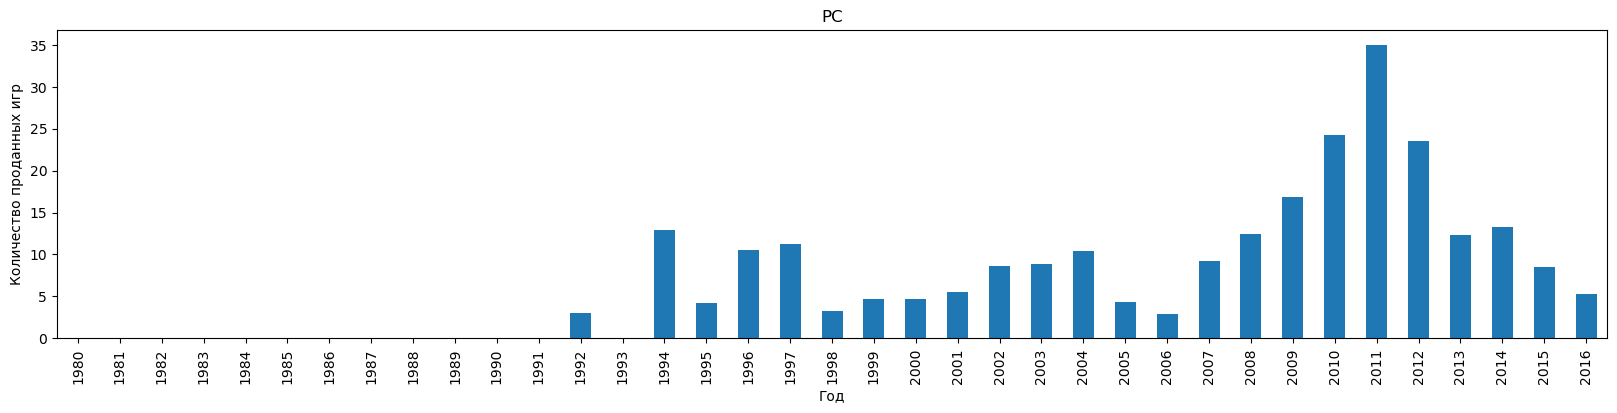

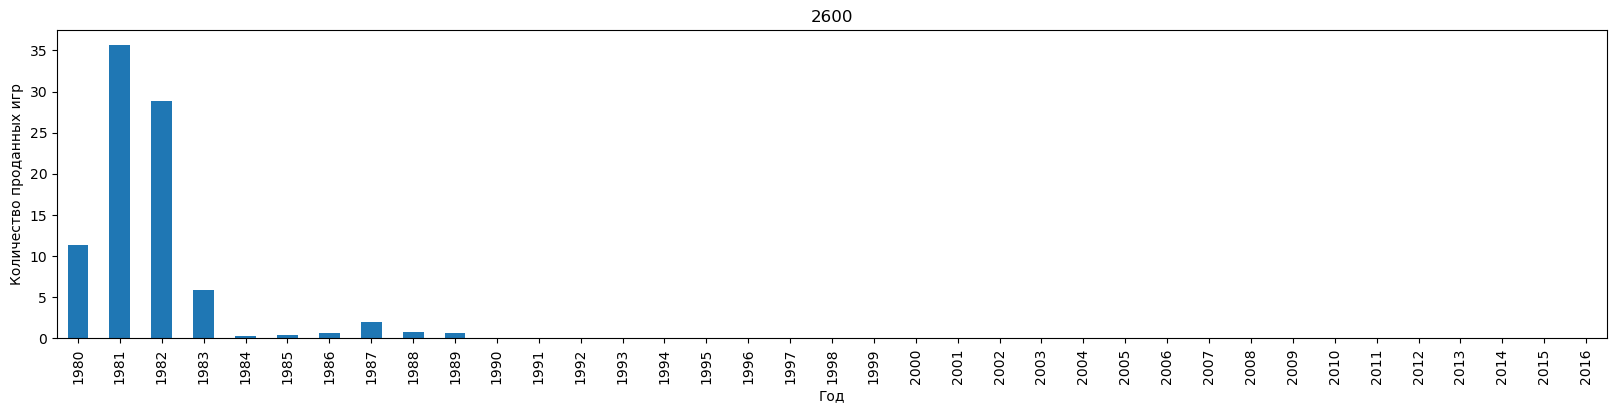

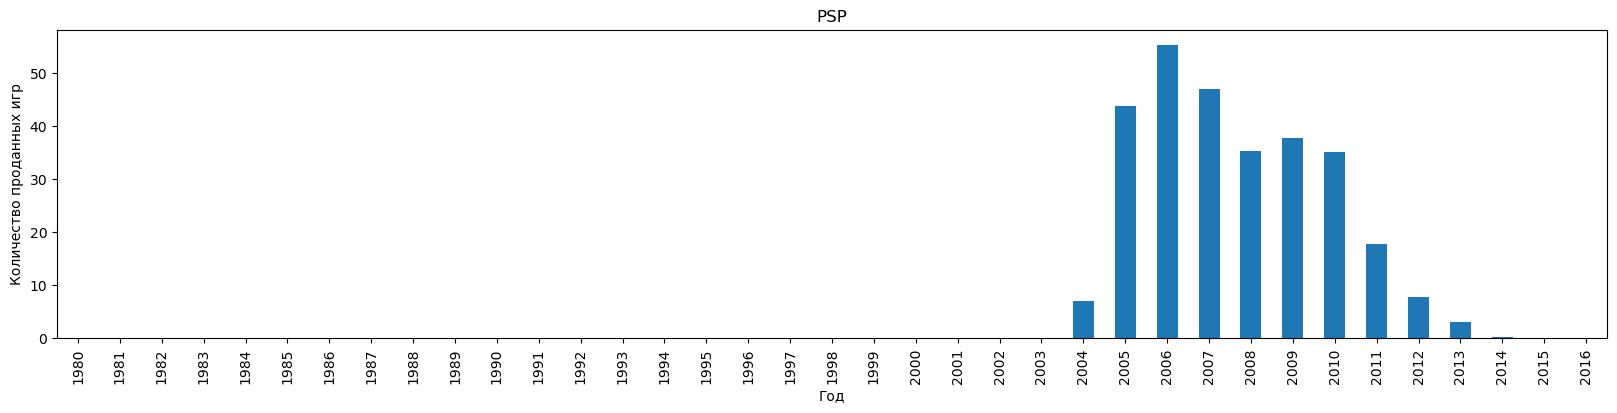

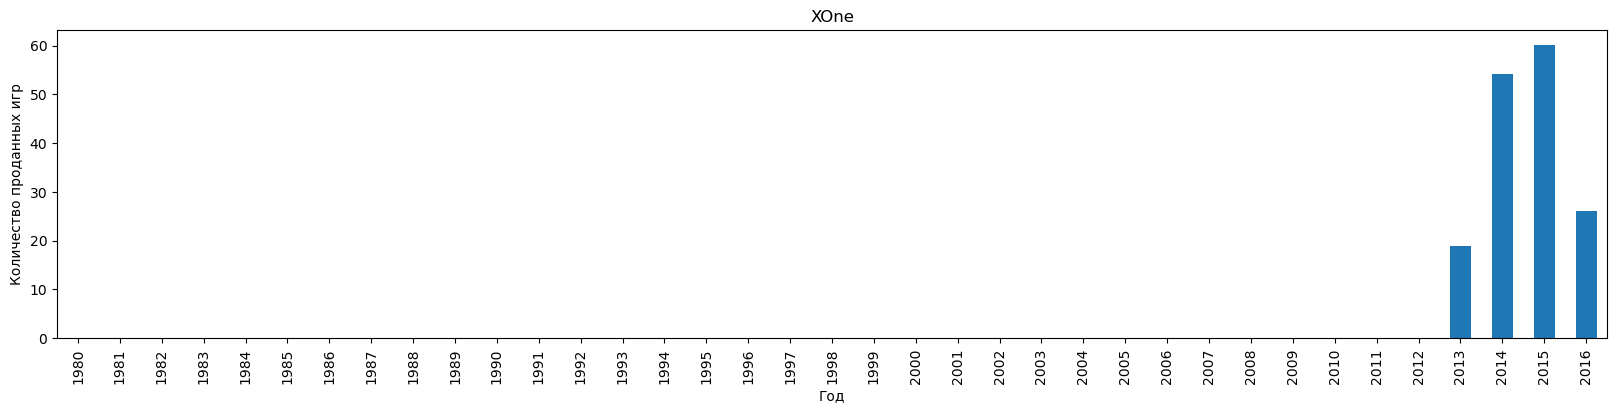

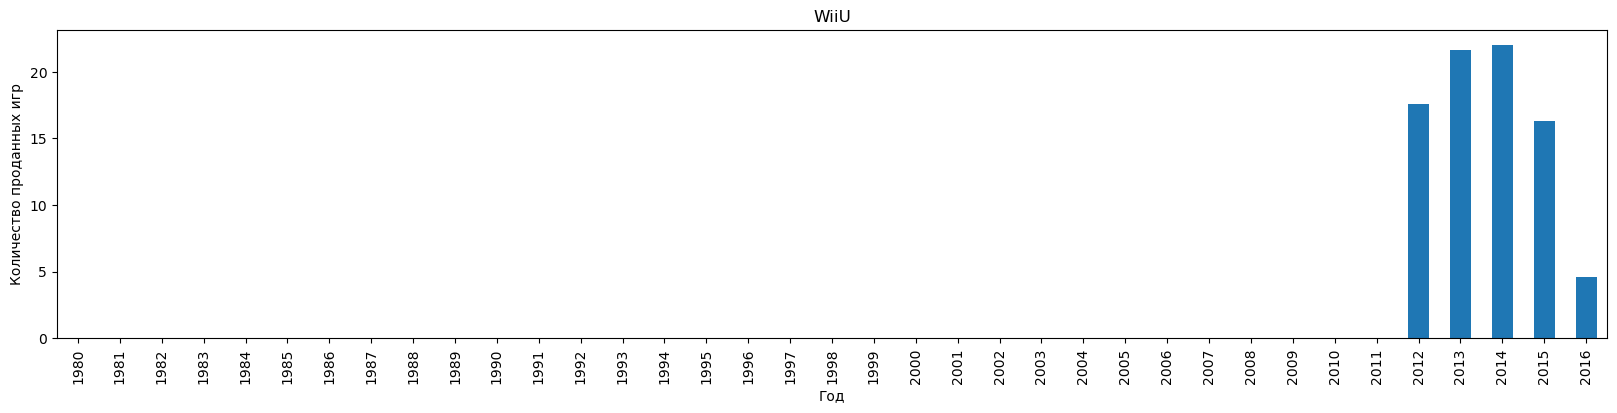

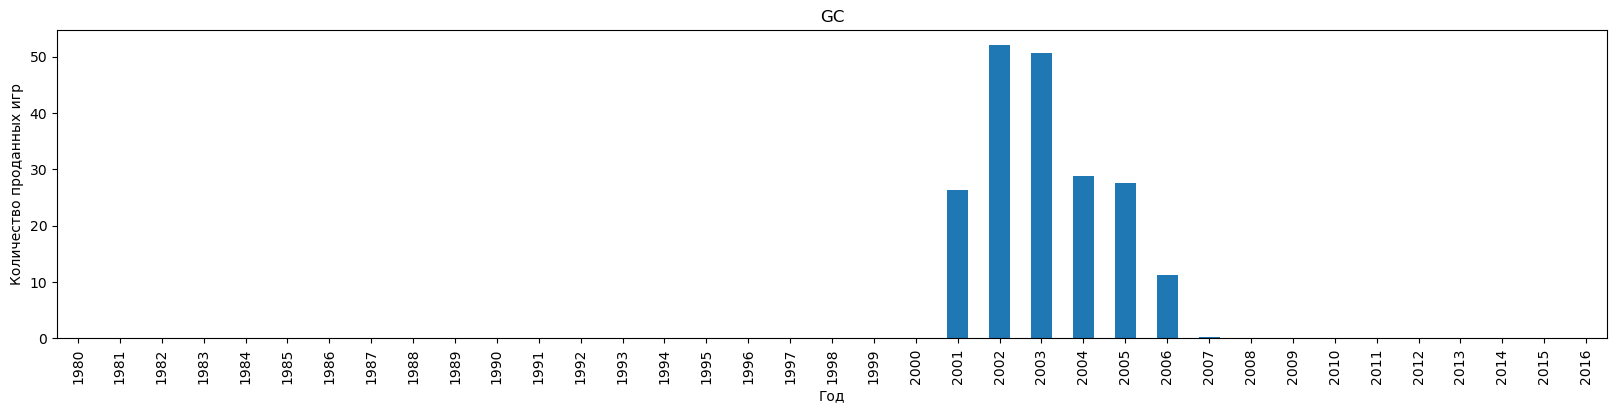

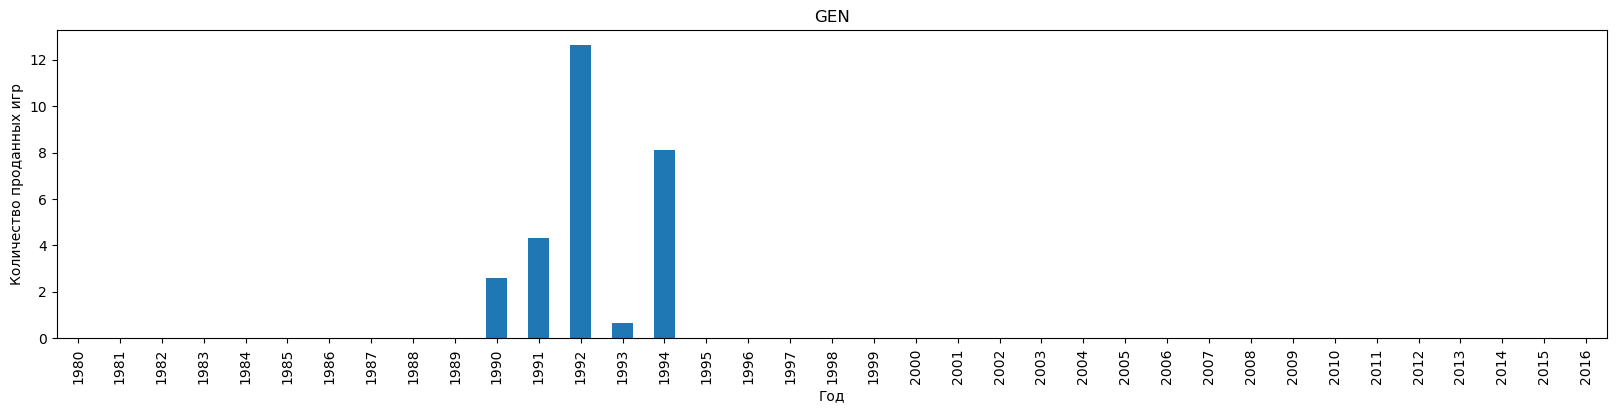

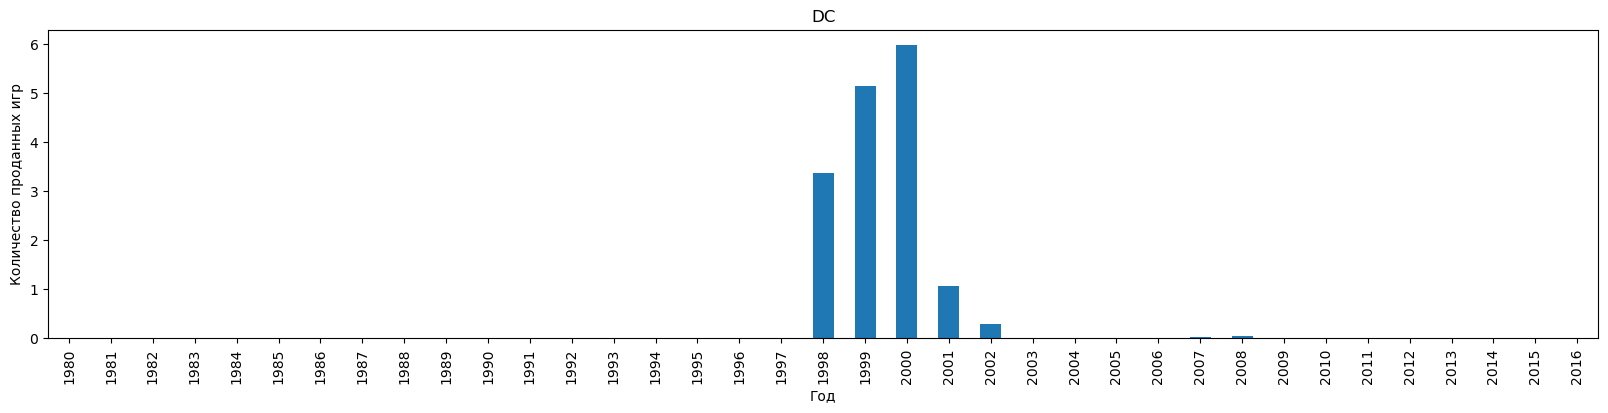

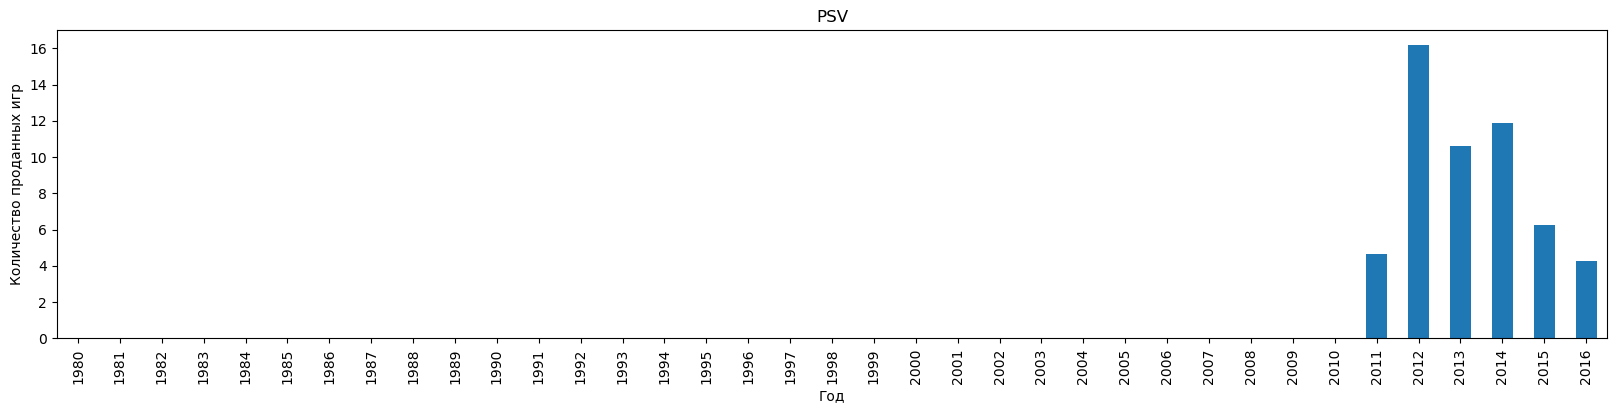

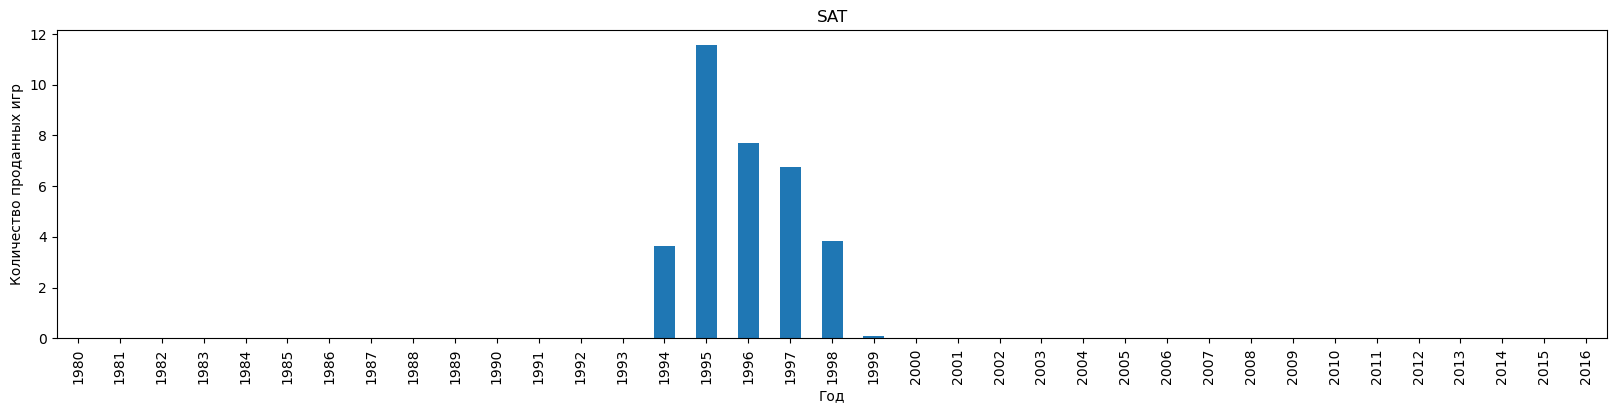

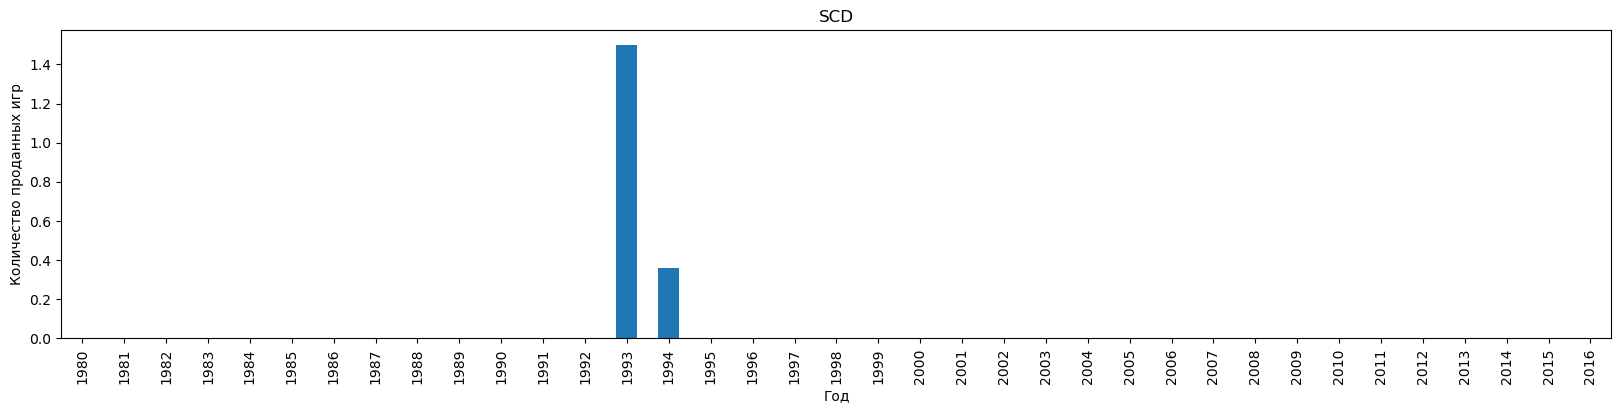

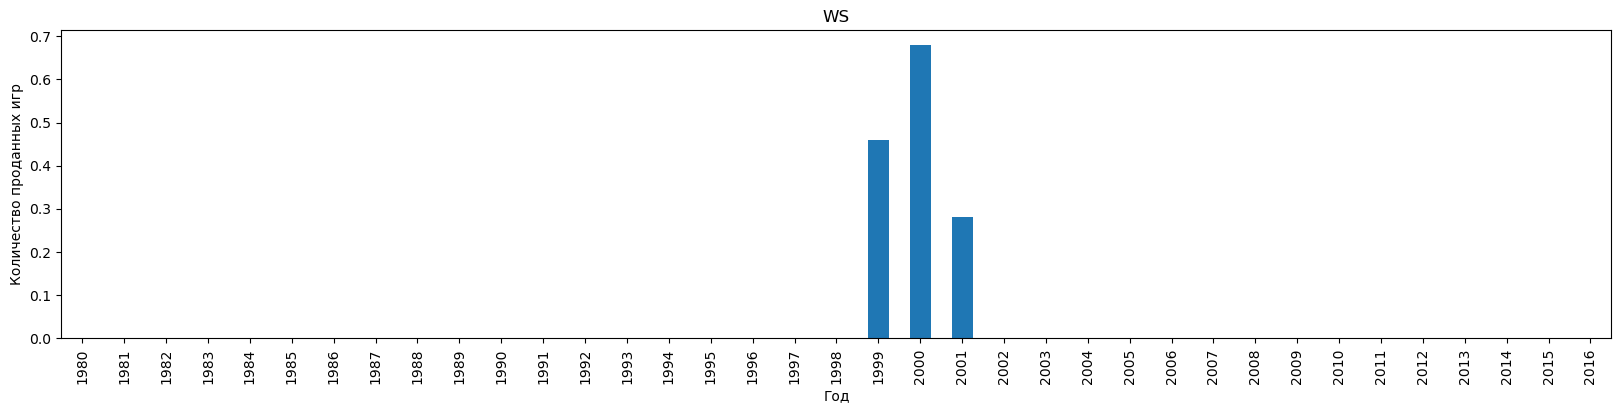

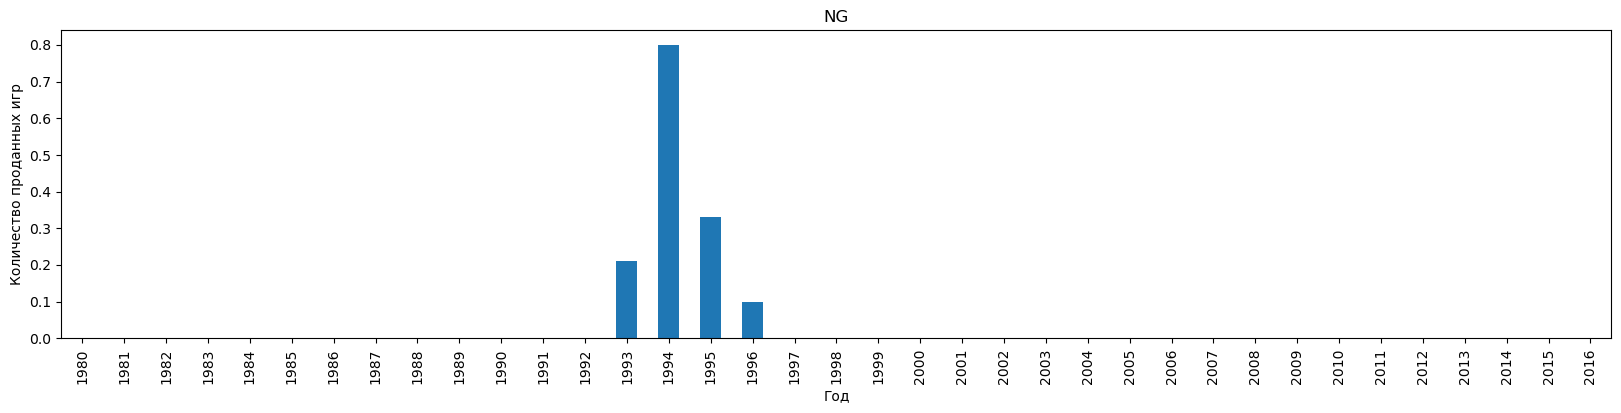

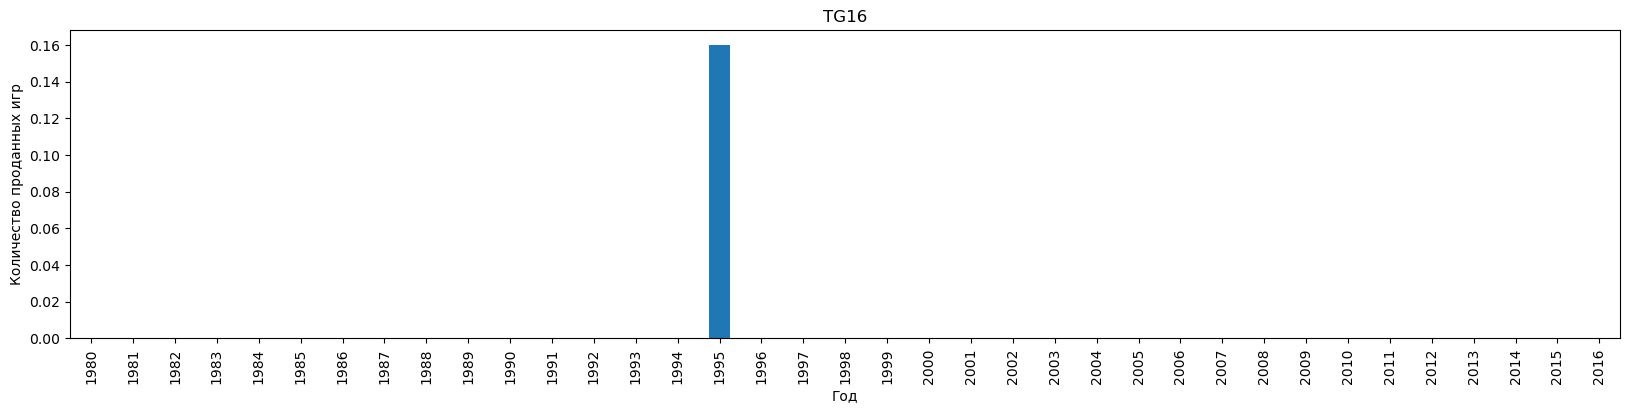

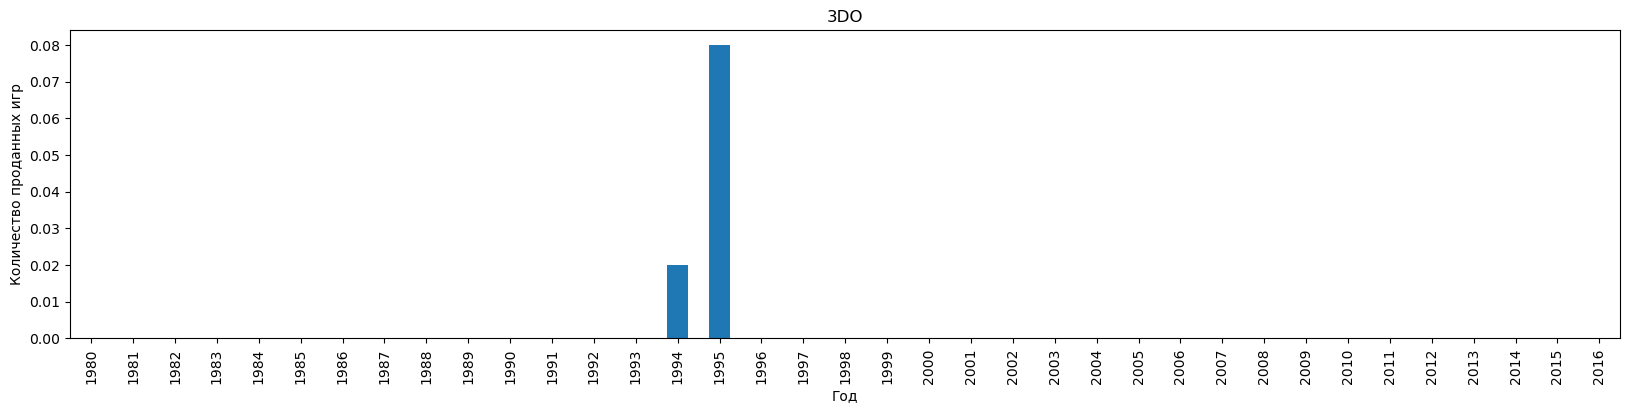

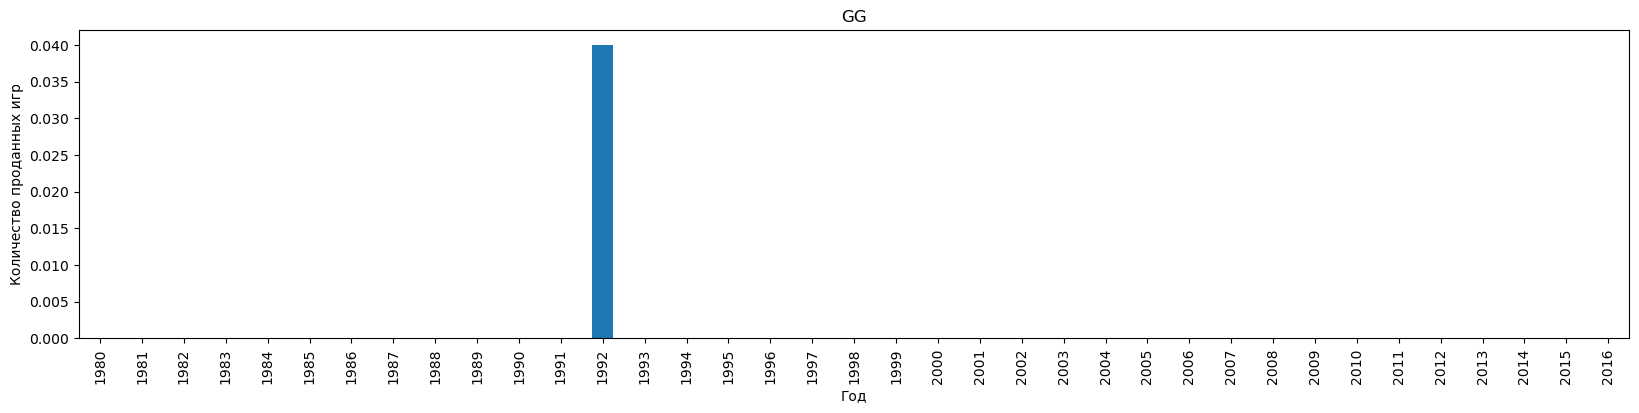

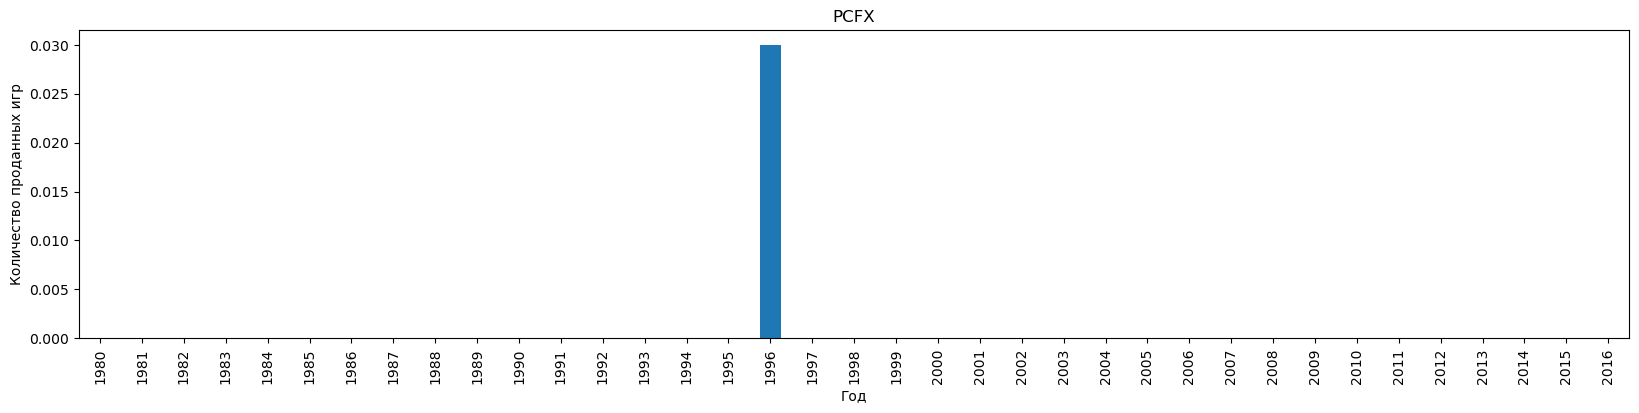

In [25]:
pl = df.pivot_table(index = 'year_of_release', columns = 'platform', values = 'sales', aggfunc = 'sum')
for val in df['platform'].unique():
    pl[val].plot(kind = 'bar', figsize = (20, 4), xlabel = 'Год', ylabel = 'Количество проданных игр')
    plt.title(val)
    plt.show()

In [26]:
srok = [10, 11, 9, 10, 9, 9, 7, 10, 7, 13, 11, 6, 8, 7, 10]
np.mean(srok)

9.133333333333333

Характерный срок от старта продаж до затухания продаж платформы - 9 лет.
Для прогноза продаж на 2017 год актуальным периодом исследования будет являться интервал с 2014 по 2016 год.

#### Исследование продаж за актуальный период.

##### Определение потенциально прибыльных косолей.

In [27]:
df2 = df[df['year_of_release'] >= 2014]

In [28]:
plat2 = df2.groupby('platform')['sales'].sum().sort_values(ascending = False).head(8)
plat2

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
PSV      22.40
Name: sales, dtype: float64

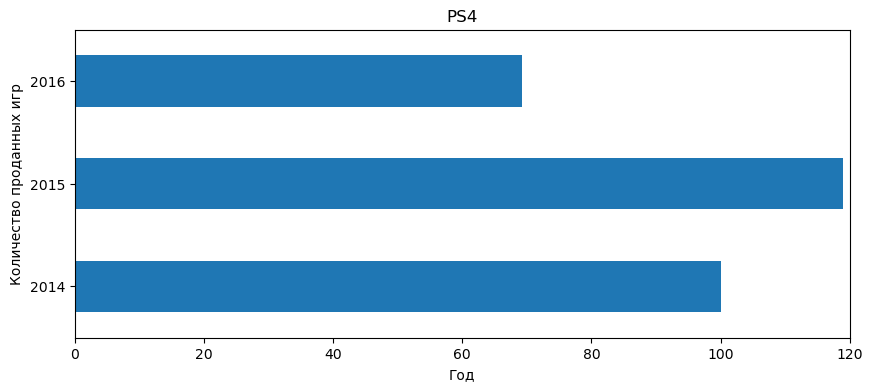

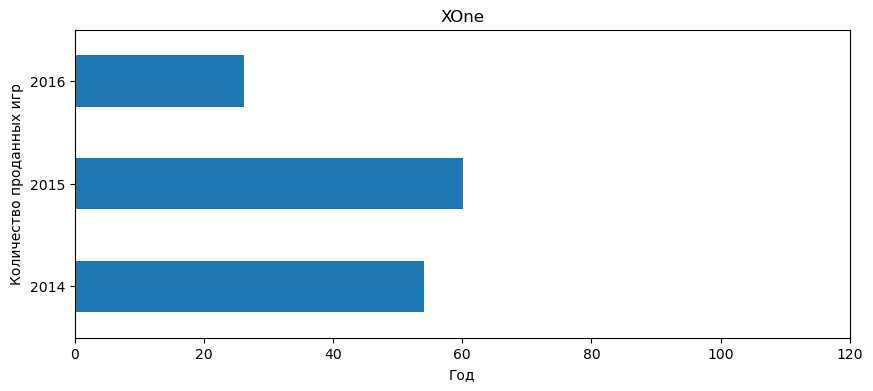

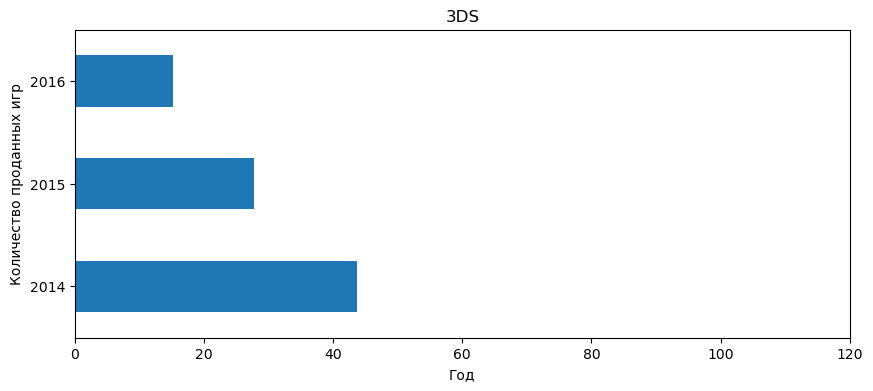

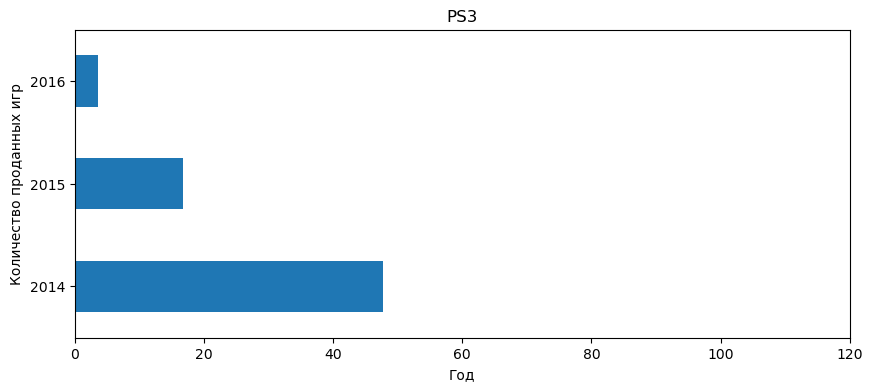

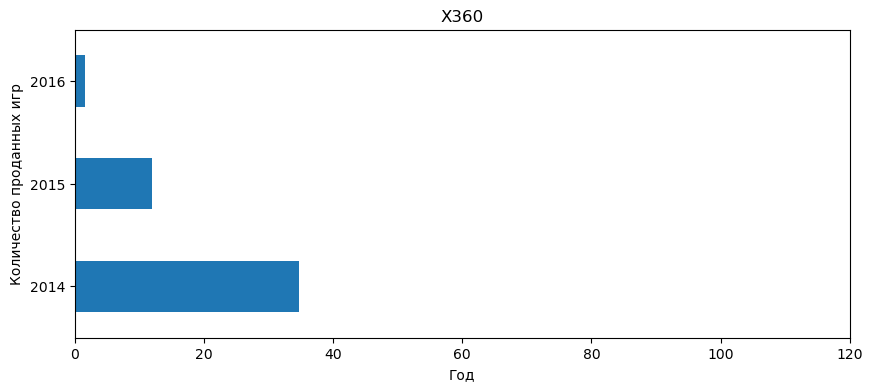

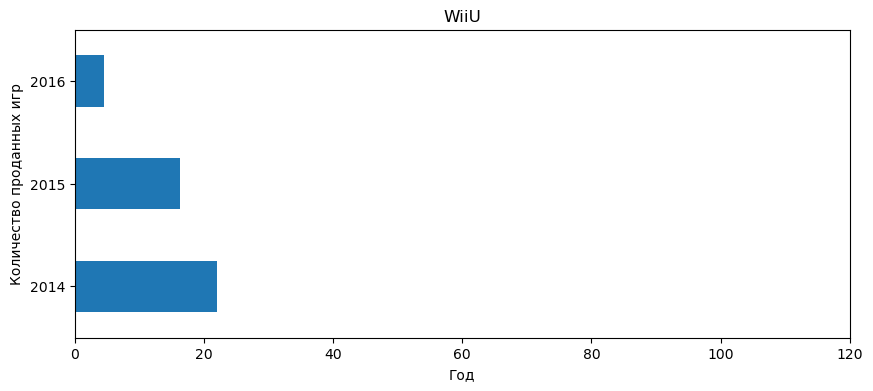

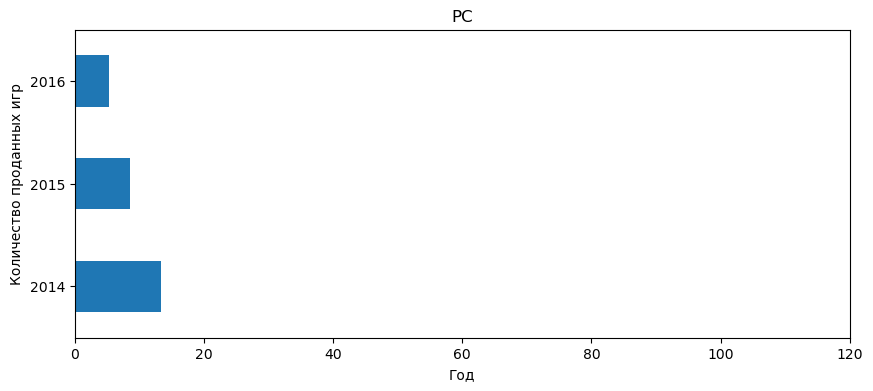

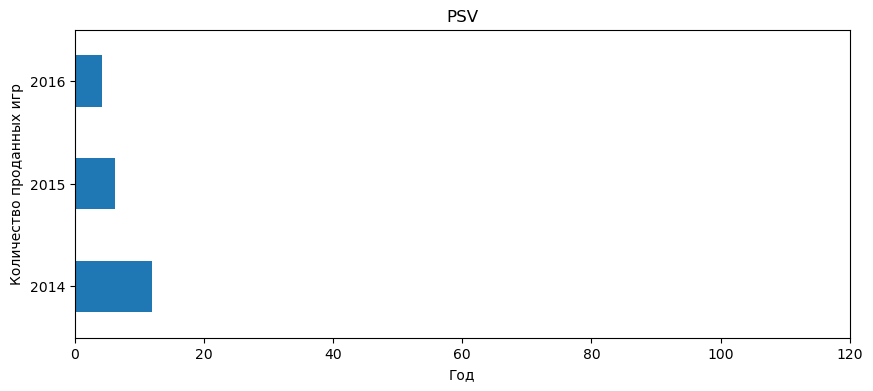

In [29]:
pl2 = df2.pivot_table(index = 'year_of_release', columns = 'platform', values = 'sales', aggfunc = 'sum')
for val in plat2.index:
    pl2[val].plot(kind = 'barh', figsize = (10, 4), xlabel = 'Год', ylabel = 'Количество проданных игр',
                 xlim = (0,120))
    #plt.axis(0, 120, 0, 3)
    plt.title(val)
    plt.show()

Среди консолей с наибольшим количеством продаж за актуальный период к концу 2016 года:
- Нулевой или близкий к нулю уровень продаж у PS3, X360, Wii, DS, PSP.
- Наблюдается спад уровня продаж, однако на конец года уровень продаж можно считать приемлимым у PS4, 3DS, XOne, PS - данные платформы наиболее потенциально прибыльные.

Рост количества продаж среди самых популярных консолей к концу 2016 не наблюдается. 

За весь исследуемый период самой популярной платформой является PS3. Среди потенциально прибыльных - PS4.
    

##### Анализ глобальных продаж.

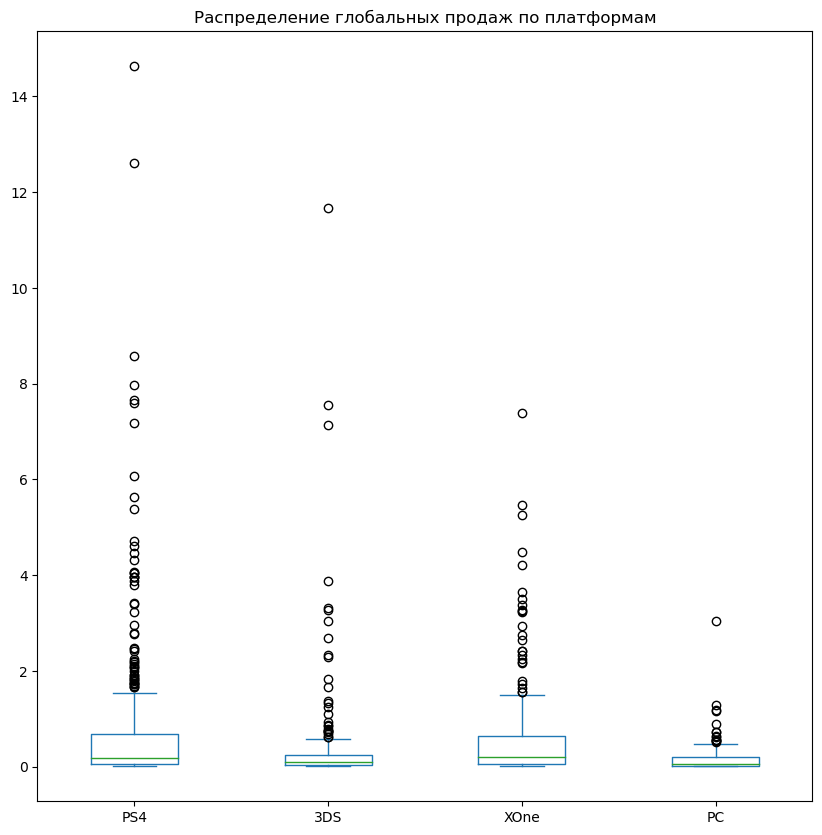

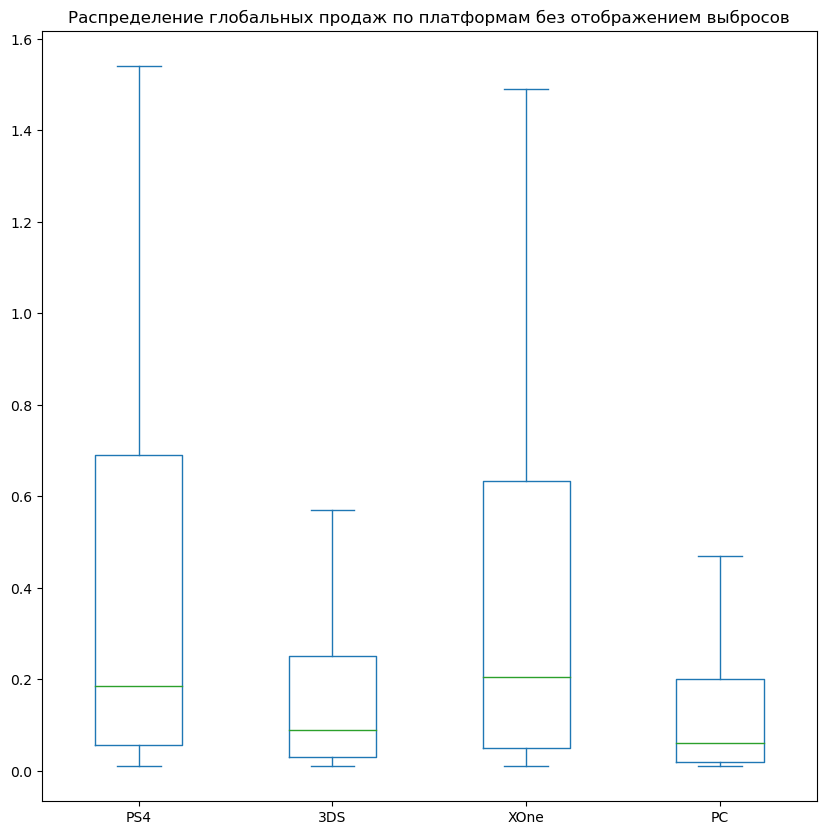

PS4 
 count    376.000000
mean       0.766356
std        1.614969
min        0.010000
25%        0.057500
50%        0.185000
75%        0.690000
max       14.630000
Name: sales, dtype: float64
3DS 
 count    212.000000
mean       0.408868
std        1.188368
min        0.010000
25%        0.030000
50%        0.090000
75%        0.250000
max       11.680000
Name: sales, dtype: float64
XOne 
 count    228.000000
mean       0.615614
std        1.046513
min        0.010000
25%        0.050000
50%        0.205000
75%        0.632500
max        7.390000
Name: sales, dtype: float64
PC 
 count    151.000000
mean       0.179139
std        0.329359
min        0.010000
25%        0.020000
50%        0.060000
75%        0.200000
max        3.050000
Name: sales, dtype: float64


In [30]:
df2['plat3'] = df2.groupby('platform').cumcount()
plat3 = df2.pivot(index = 'plat3', columns = 'platform', values = 'sales')
plat3[['PS4', '3DS', 'XOne', 'PC']].plot(kind = 'box', figsize = (10, 10))
plt.title('Распределение глобальных продаж по платформам');
plt.show()
plat3[['PS4', '3DS', 'XOne', 'PC']].plot(kind = 'box', figsize = (10, 10), sym = '')
plt.title('Распределение глобальных продаж по платформам без отображением выбросов');
plt.show()
for val in ['PS4', '3DS', 'XOne', 'PC']:
    print(val, '\n', df2.loc[df2['platform'] == val, 'sales'].describe())
    

Медианные значения продажи одной игры для разных платформ среди потенциально прибыльных составляют от 60 тыс. проданных копий для PC до 205 тыс. проданных копий для Xone. Для каждой из платформ можно наблюдать выбросы, где продажи игр могут достигать от 3 млн проданных копий для PC до 14 млн проданных копий для PS4.

##### Анализ продаж в зависимости от оценок пользователей и критиков.

Для исследования была выбрана самая популярная консоль среди потенциально прибыльных - PS4.

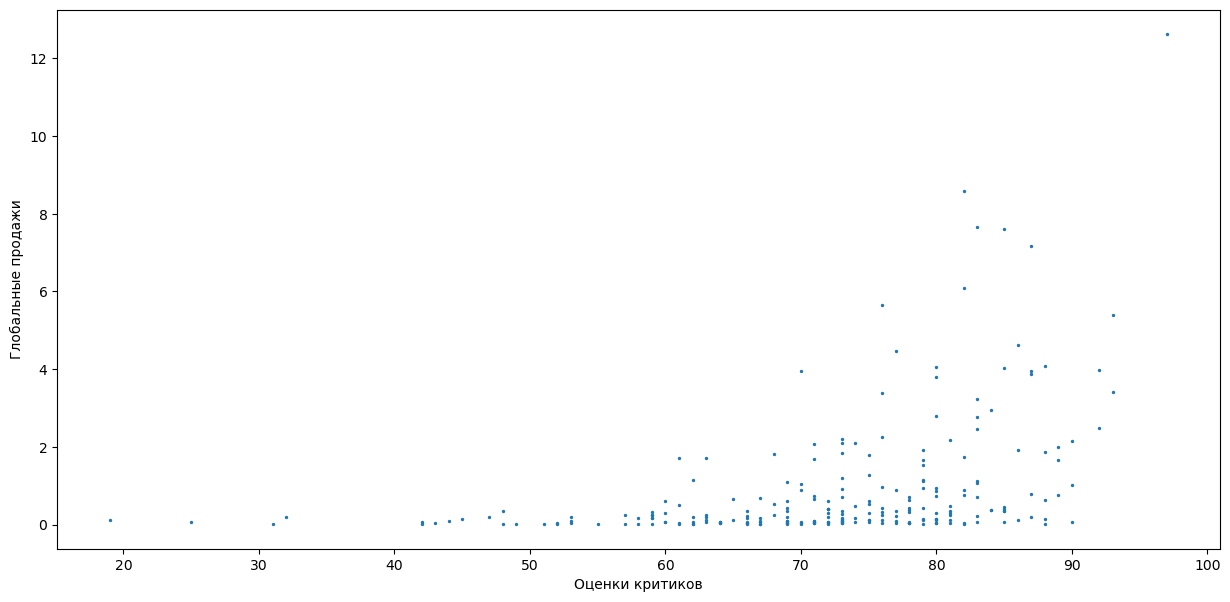

0.40266141068104083

In [31]:
df2.loc[df2['platform'] == 'PS4'].plot(kind = 'scatter', x = 'critic_score', y = 'sales', figsize = (15,7),
         xlabel = 'Оценки критиков', ylabel = 'Глобальные продажи', alpha = 1, s = 2);
plt.show()
cor = df2.loc[df2['platform'] == 'PS4', 'critic_score'].corr(df2['sales'])
cor

Коэф. корреляции Пиросона больше 0, можно сделать вывод о том, что существует прямая зависимость между уровнем продаж и оценкой критиков, однако значение коэффицента  не близко к 1, что говорит о том, что связь между оценкой критиков и уровнем продаж нельзя назвать сильной.

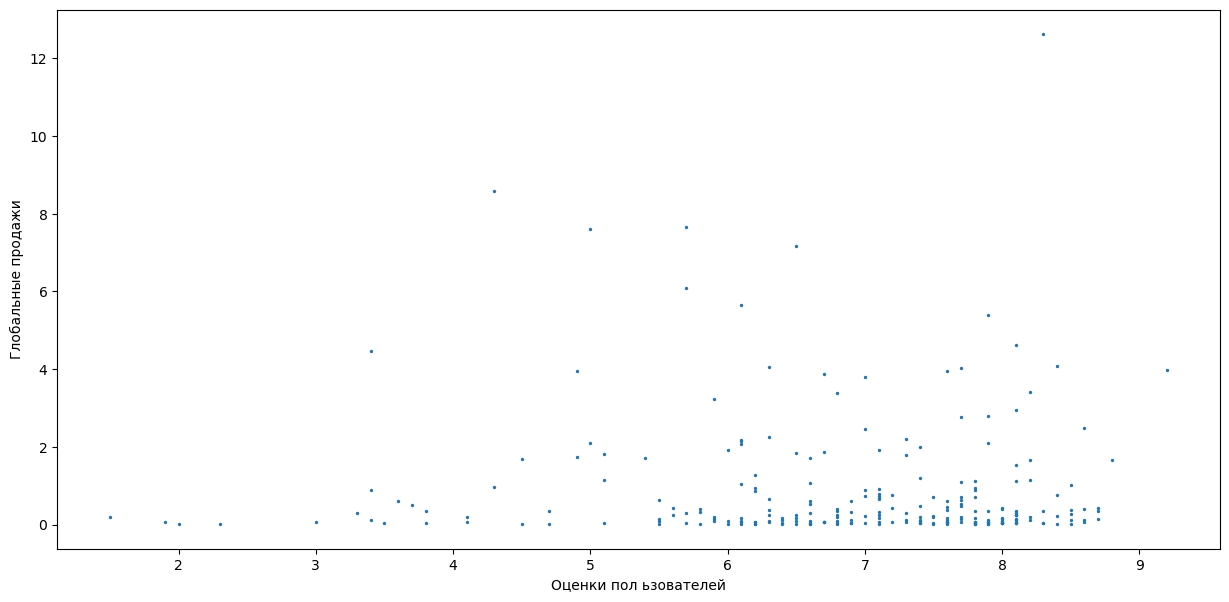

-0.040131589472697356

In [32]:
df2.loc[df2['platform'] == 'PS4'].plot(kind = 'scatter', x = 'user_score', y = 'sales', figsize = (15,7),
         xlabel = 'Оценки пол ьзователей', ylabel = 'Глобальные продажи', s = 2, alpha = 1,);
plt.show()
cor = df2.loc[df2['platform'] == 'PS4','user_score'].corr(df2['sales'])
cor

Коэф. корреляции Пиросона отрицателен и близок по значению к 0, можно сделать вывод о том, что связь между уровнем продаж и оценкой пользователей отсутствует

##### Анализ связи между оценками критиков и пользователей и уровнем продаж для других родажами игр на других платформ.

In [33]:
print('Значение коэффициента кореляции Пирсона:')
for val in ['3DS', 'XOne', 'PC', 'PS4']:
    print(f'Для {val}:')
    print('оценка критиков:', df2.loc[df2['platform'] == val, 'critic_score'].corr(df2.loc[df2['platform'] == val, 'sales']))
    print('оценка пользователей:', df2.loc[df2['platform'] == val, 'user_score'].corr(df2.loc[df2['platform'] == val, 'sales']))

Значение коэффициента кореляции Пирсона:
Для 3DS:
оценка критиков: 0.314117492869051
оценка пользователей: 0.2151932718527028
Для XOne:
оценка критиков: 0.42867694370333226
оценка пользователей: -0.0703839280647581
Для PC:
оценка критиков: 0.17463413769350036
оценка пользователей: -0.07159665703472451
Для PS4:
оценка критиков: 0.40266141068104083
оценка пользователей: -0.040131589472697356


Для остальных платформ связи между продажами от оценок пользователей и критиков имеют схожий характер, исключением можно назвать болею сильную связь продаж от оценок пользователей для платформы 3DS, однако эта связь также слабее, чем связь от оценок критиков.

##### Анализ распределения продаж по жанрам.

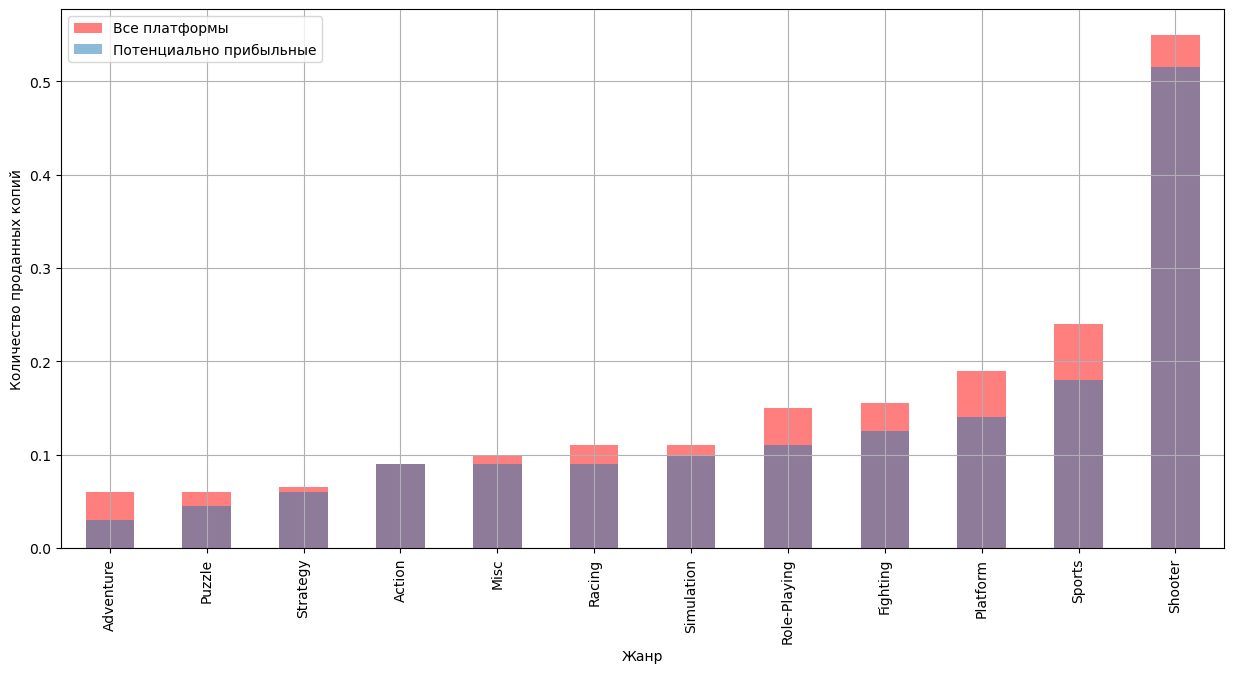

genre
Adventure       0.030
Puzzle          0.045
Strategy        0.060
Action          0.090
Misc            0.090
Racing          0.090
Simulation      0.100
Role-Playing    0.110
Fighting        0.125
Platform        0.140
Sports          0.180
Shooter         0.515
Name: sales, dtype: float64
genre
Strategy        0.060
Adventure       0.060
Puzzle          0.065
Misc            0.090
Racing          0.100
Action          0.110
Simulation      0.110
Fighting        0.150
Platform        0.155
Role-Playing    0.190
Sports          0.240
Shooter         0.550
Name: sales, dtype: float64


In [34]:
df2[df2['platform'].isin(['PS4', '3DS', 'XOne', 'PC'])].groupby('genre')['sales'].median().sort_values().plot(kind = 'bar',
xlabel = 'Жанр', ylabel = 'Количество проданных копий', figsize = (15,7), grid = True, color = 'red', alpha = 0.5)
df2.groupby('genre')['sales'].median().sort_values().plot(kind = 'bar',
        xlabel = 'Жанр', ylabel = 'Количество проданных копий', figsize = (15,7), grid = True, alpha = 0.5)
plt.legend(['Все платформы', 'Потенциально прибыльные']);
plt.show()
print(df2.groupby('genre')['sales'].median().sort_values())
print(df2[df2['platform'].isin(['PS4', '3DS', 'XOne', 'PC'])].groupby('genre')['sales'].median().sort_values())

Самыми популярными жанрами являются  "Shooter", "Sports", "Platform", "Fighting".

## Портрет пользователя каждого региона.

### Определение самых популярных платформ

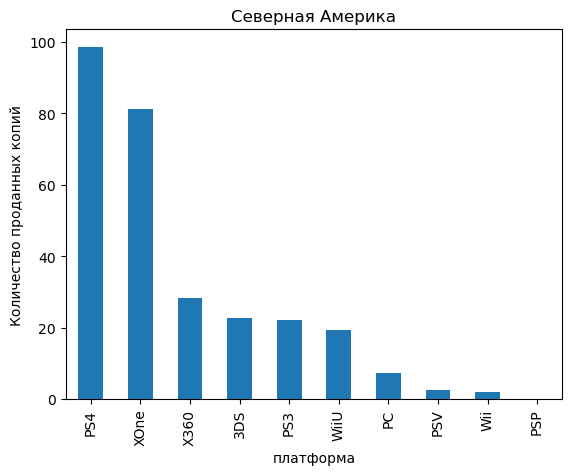

ТОП-5 консолей 
 platform
PS4     98.61
XOne    81.27
X360    28.30
3DS     22.64
PS3     22.05
Name: na_sales, dtype: float64
Общее количество продаж: 284.06


In [35]:
na = df2.groupby('platform')['na_sales'].sum().sort_values(ascending = False)
na.plot(kind = 'bar', xlabel = 'платформа', ylabel = 'Количество проданных копий');
plt.title('Северная Америка')
plt.show()
print('ТОП-5 консолей', '\n', na.head())
print('Общее количество продаж:', na.sum())

Самыми популярными платформами в Северной Америке являются PS4, XOne, X360, 3DS, PS3. Высокие позиции консолей XOne и X360 можно объяснить тем, что данные платформы являются мультимедийными системами, произведена и активно рекламируется для жителей Северной Америки. Так же Северная Америка является лидером по общему количеству проданных игр.

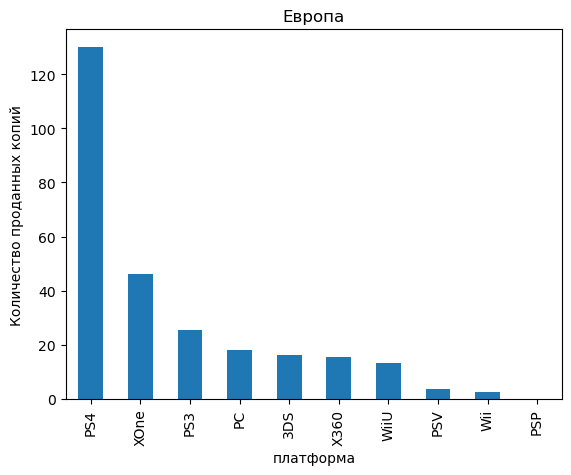

ТОП-5 консолей 
 platform
PS4     130.04
XOne     46.25
PS3      25.54
PC       17.97
3DS      16.12
Name: eu_sales, dtype: float64
Общее количество продаж: 270.67999999999995


In [36]:
eu = df2.groupby('platform')['eu_sales'].sum().sort_values(ascending = False)
eu.plot(kind = 'bar', xlabel = 'платформа', ylabel = 'Количество проданных копий');
plt.title('Европа')
plt.show()
print('ТОП-5 консолей', '\n', eu.head())
print('Общее количество продаж:', eu.sum())

Самыми популярными платформами в Европе являются PS4, XOne, PS3, PC, 3DS. Данная статистика говорит о том, что у жителей Европы выше интерес к производителю Sony - продажи PS3 и PS4 - 1 и 3 место против продаж аналогичных консолей от Microsoft X360 и XOne - 2 и 6 место. Также в Европе значительно выше уровень продаж игр на ПК (4 место) по сравнению с остальными континентами (7 место в Северной Америке и 9 место в Японии).

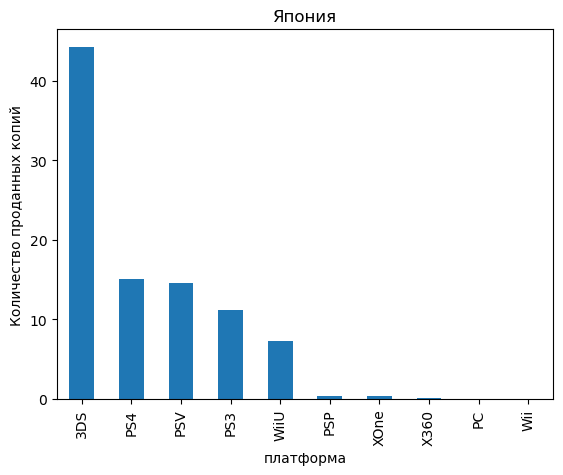

platform
3DS     44.24
PS4     15.02
PSV     14.54
PS3     11.22
WiiU     7.31
Name: jp_sales, dtype: float64

In [37]:
jp = df2.groupby('platform')['jp_sales'].sum().sort_values(ascending = False)
jp.plot(kind = 'bar', xlabel = 'платформа', ylabel = 'Количество проданных копий');
plt.title('Япония')
plt.show()
jp.head()

Самыми популярными платформами в Японии являются 3DS, PS4, PSV, PS3, WiiU. Наибольший интерес по сравнению с жителями остальных континентов жители Японии проявляют к портативным консолям - 1, 3, 6 место у портативных консолей, в то время как в Северной Америке в ТОП-5 входит только 3DS - 4 место, в Европе 3DS - 5 место. Также среди жителей Японии по сравнению с остальными континентами значительно ниже уровень продаж у платформ X360, Xone, PC.

### Определение самых популярных жанров.

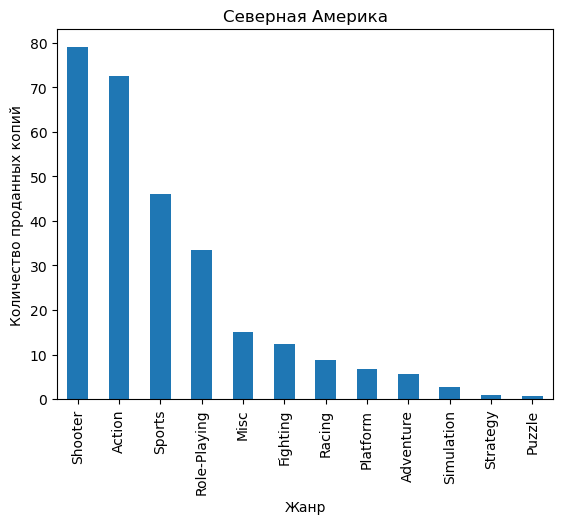

genre
Shooter         79.02
Action          72.53
Sports          46.13
Role-Playing    33.47
Misc            15.05
Fighting        12.43
Racing           8.74
Platform         6.79
Adventure        5.64
Simulation       2.63
Strategy         0.98
Puzzle           0.65
Name: na_sales, dtype: float64

In [38]:
na = df2.groupby('genre')['na_sales'].sum().sort_values(ascending = False)
na.plot(kind = 'bar', xlabel = 'Жанр', ylabel = 'Количество проданных копий');
plt.title('Северная Америка')
plt.show()
na

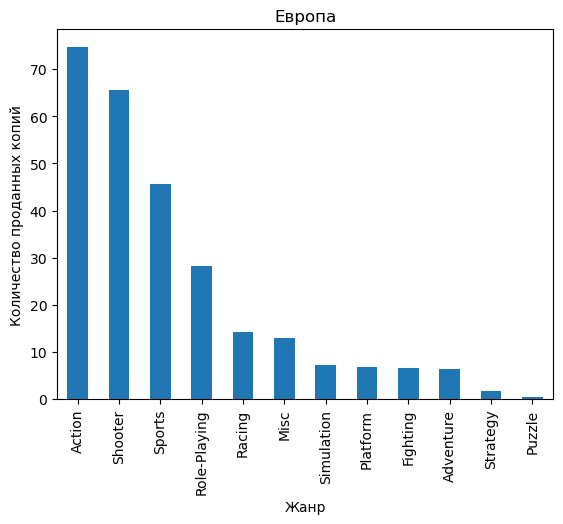

genre
Action          74.68
Shooter         65.52
Sports          45.73
Role-Playing    28.17
Racing          14.13
Misc            12.86
Simulation       7.30
Platform         6.80
Fighting         6.69
Adventure        6.49
Strategy         1.79
Puzzle           0.52
Name: eu_sales, dtype: float64

In [39]:
eu = df2.groupby('genre')['eu_sales'].sum().sort_values(ascending = False)
eu.plot(kind = 'bar', xlabel = 'Жанр', ylabel = 'Количество проданных копий');
plt.title('Европа')
plt.show()
eu

Жанровые предпочтения жителей Северной Америки и Европы практически идентичные - первые 6 позиций по продажам одинаковы - Action, Shooter, Sports, Role-Playing, Misc; в Европе незначительно выше по продажам жанры Racing, Simulation.

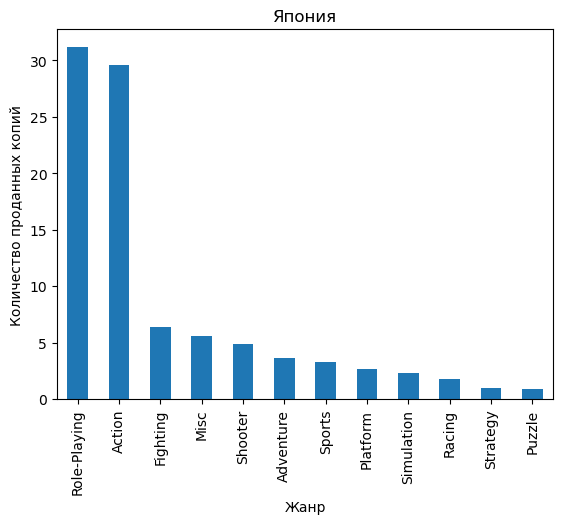

genre
Role-Playing    31.16
Action          29.58
Fighting         6.37
Misc             5.61
Shooter          4.87
Adventure        3.60
Sports           3.26
Platform         2.69
Simulation       2.31
Racing           1.76
Strategy         0.95
Puzzle           0.93
Name: jp_sales, dtype: float64

In [40]:
jp = df2.groupby('genre')['jp_sales'].sum().sort_values(ascending = False)
jp.plot(kind = 'bar', xlabel = 'Жанр', ylabel = 'Количество проданных копий');
plt.title('Япония')
plt.show()
jp

В Японии жанры Role-Playing, Action имеют наибольшую популярность, также данные жанры занимают значительно больше половины всех продаж, в то время как в Европе и Северной Америке продажи по жанрам распределены более равномерно. Самый популярный жанр Role-Playing занимает треть от общего количества продаж, в Америке и Европе данный жанр находится на 4 месте. Жанр Shooter находится на 5 месте, в то время как в Америке и Европе данный жанр второй по популярности. 

### Оценка влияния рейтинга ESRB на продажи в отдельном регионе.

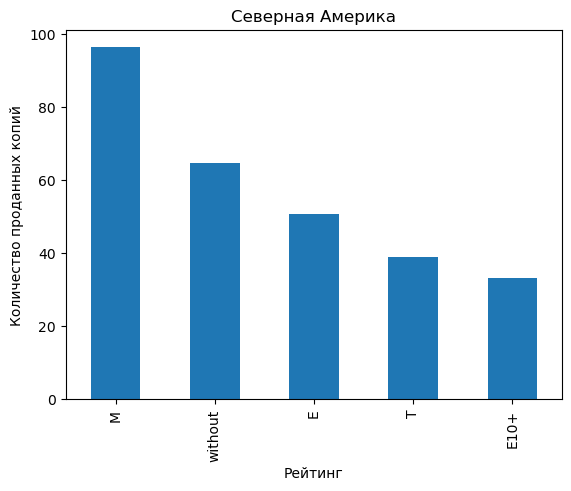

rating
M          96.42
without    64.72
E          50.74
T          38.95
E10+       33.23
Name: na_sales, dtype: float64

In [41]:
na = df2.groupby('rating')['na_sales'].sum().sort_values(ascending = False)
na.plot(kind = 'bar', xlabel = 'Рейтинг', ylabel = 'Количество проданных копий');
plt.title('Северная Америка')
plt.show()
na

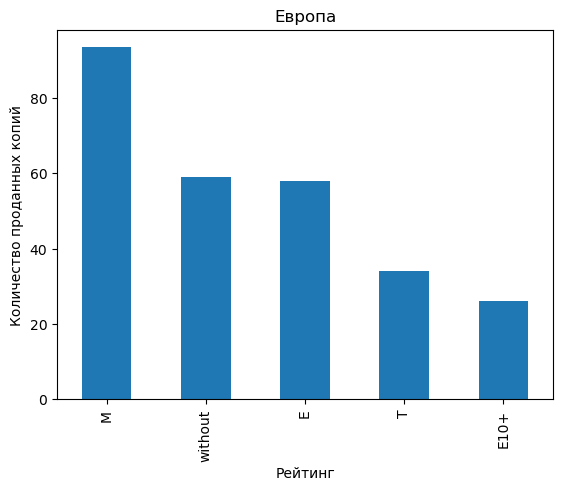

rating
M          93.44
without    58.95
E          58.06
T          34.07
E10+       26.16
Name: eu_sales, dtype: float64

In [42]:
eu = df2.groupby('rating')['eu_sales'].sum().sort_values(ascending = False)
eu.plot(kind = 'bar', xlabel = 'Рейтинг', ylabel = 'Количество проданных копий');
plt.title('Европа')
plt.show()
eu

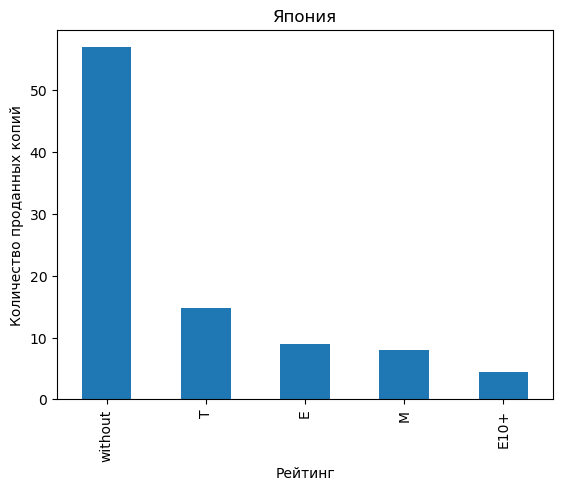

rating
without    56.90
T          14.78
E           8.94
M           8.01
E10+        4.46
Name: jp_sales, dtype: float64

In [43]:
jp = df2.groupby('rating')['jp_sales'].sum().sort_values(ascending = False)
jp.plot(kind = 'bar', xlabel = 'Рейтинг', ylabel = 'Количество проданных копий');
plt.title('Япония')
plt.show()
jp

В Северной Америке и Европе игры имеют схожие показатели продаж в зависимости от рейтинга, наибольшую попярность имеют игры с рейтингом 17+, на втором месте игры без рейтинга. В Японии почти две трети рынка занимают игры без категри, категория 17+ находится только на 4 месте. Причиной большого количества игр без рейтинга мог стать тот факт, что ESPB не высталяет рейтинги для игр, не выпускаемых в Северной Америке.

## Проверка гипотез.

### Гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Определяем нулевую гипотезу: средние пользовательские рейтинги платформ Xbox One и PC равны.
    
Определяем альтернативную гипотезу: средние пользовательские рейтинги платформ Xbox One и PC не равны.
    
Так как в исходном датасете во многих ячейках отсутствуют данные о пользовательских рейтингах, исследование данного параметра будет проводится по выборкам для каждой платформы.
    
Пороговое значение вероятности, по которому принимаем решении о принятии нулевой гипотезы - 0.05 

In [44]:
arrayx = df2.loc[(df['platform'] == 'XOne') & (~np.isnan(df['user_score'])), 'user_score']
arrayx.count()

165

In [45]:
arraypc = df2.loc[(df['platform'] == 'PC') & (~np.isnan(df['user_score'])), 'user_score']
arraypc.count()

122

In [46]:
test = st.ttest_ind(arrayx,arraypc)
test.pvalue

0.10450507919348415

Значение параметра P-value превышает пороговое значение, поэтому принимаем нулевую гипотезу.

### Гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные.

Определяем нулевую гипотезу: средние пользовательские рейтинги жанров Action и Sports равны.
    
Определяем альтернативную гипотезу: средние пользовательские рейтинги платформ жанров Action и Sports не равны.
    
Так как в исходном датасете во многих ячейках отсутствуют данные о пользовательских рейтингах, исследование данного параметра будет проводится по выборкам для каждого жанра.
    
Пороговое значение вероятности, по которому принимаем решении о принятии нудевой гипотезы - 0.05 

In [47]:
arrayac = df2.loc[(df['genre'] == 'Action') & (~np.isnan(df['user_score'])), 'user_score']
arrayac.count()

297

In [48]:
arraysp = df2.loc[(df['genre'] == 'Sports') & (~np.isnan(df['user_score'])), 'user_score']
arraysp.count()

127

In [49]:
test = st.ttest_ind(arrayac,arraysp)
test.pvalue

2.8711147985105864e-19

Значение параметра P-value значительно ниже порогового значения, поэтому принимаем альтернативную гипотезу.

## Вывод

Для проведения исследования была выполнена загрузка и предобработка данных, в результате которой:
- Удалены строки с пропущенными значениями в названии игр;
- Частично заполнены пропуски в параметре "год выхода";
- Поиск и удаление явных и не явных дубликатов;
- Приведены данные к необходимому формату в параметре "оценка пользователей".

В результате выполнения исследовательского анализа были сделаны следующие выводы:

- До 1995 года наблюдался планый рост количества проданных игр, затем резкий рост до максимального значения в 2008 году - около 600 млн проданных копий, затем резкое падение, вызванное финансовым кризисом и вследствии этого изменения подхода к разработке игр;
- Лидером по количеству проданных копий за все время является платформа PS2 - более 1000 млн проданных копий, также к лидерам можно отнести X360, Wii, PS3, DS, PS.;
- Характерный срок от старта продаж до затухания продаж платформы - 9 лет, актуальные период исследования для прогноза на 2017 год - 3 года;
- Наиболее потенциально прибыльные платформы - PS4, XOne, 3DS, PC;
- Медианные значения продажи одной игры для разных платформ среди потенциально прибыльных составляют от 60 тыс. проданных копий для PC до 205 тыс. проданных копий для Xone. Для каждой из платформ можно наблюдать выбросы, где продажи игр могут достигать от 3 млн проданных копий для PC до 14 млн проданных копий для PS4;
- Для всех консолей продажи имеют прямую зависимость от оценок критиков, однако данную связь нельзя назвать очень сильной; оценки пользователей не оказывают влияния на продажи, за исключением платформы 3DS, где иеется прямая зависимость продаж от оценок пользователей, однако эта связь очень слабая.;
- Самыми популярными жанрами являются "Shooter", "Sports", "Platform", "Fighting".

Был составлен портрет пользователя каждого региона:
- Самыми популярными платформами в Северной Америке являются PS4, XOne, X360, 3DS, PS3. Высокие позиции консолей XOne и X360 можно объяснить тем, что данные платформы являются мультимедийными системами, произведена и активно рекламируется для жителей Северной Америки. Так же Северная Америка является лидером по общему количеству проданных игр;
- Самыми популярными платформами в Европе являются PS4, XOne, PS3, PC, 3DS. Данная статистика говорит о том, что у жителей Европы выше интерес к производителю Sony - продажи PS3 и PS4 - 1 и 3 место против продаж аналогичных консолей от Microsoft X360 и XOne - 2 и 6 место. Также в Европе значительно выше уровень продаж игр на ПК (4 место) по сравнению с остальными континентами (7 место в Северной Америке и 9 место в Японии);
- Самыми популярными платформами в Японии являются 3DS, PS4, PSV, PS3, WiiU. Наибольший интерес по сравнению с жителями остальных континентов жители Японии проявляют к портативным консолям - 1, 3, 6 место у портативных консолей, в то время как в Северной Америке в ТОП-5 входит только 3DS - 4 место, в Европе 3DS - 5 место. Также среди жителей Японии по сравнению с остальными континентами значительно ниже уровень продаж у платформ X360, Xone, PC;
- Жанровые предпочтения жителей Северной Америки и Европы практически идентичные - первые 6 позиций по продажам одинаковы - Shooter, Sports, Role-Playing, Musc; в Европе незначительно выше по продажам жанры Racing, Simulation, Strategy.
- В Японии жанры Role-Playing, Action имеют наибольшую популярность. Самый популярный жанр Role-Playing занимает треть от общего количества продаж, в Америке и Европе данный жанр находится на 5 месте. Жанр Shooter находится на 8 месте, в то время как в Америке и Европе данный жанр второй по популярности.
- В Северной Америке и Европе игры имеют схожие показатели продаж в зависимости от рейтинга, наибольшую попярность имеют игры с рейтингом 17+, на втором месте игры без рейтинга. В Японии почти две трети рынка занимают игры без категри, категория 17+ находится только на 4 месте. Причиной большого количества игр без рейтинга мог стать тот факт, что ESPB не высталяет рейтинги для игр, не выпускаемых в Северной Америке.

Была произведена проверка гипотез, в результате были приняты следующие гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC равны.
- Средние пользовательские рейтинги платформ жанров Action и Sports не равны.
